<div>
<img src="https://www.th-koeln.de/img/logo.svg" width="100">
</div>

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons Lizenzvertrag" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a>
<br />Dieses Werk ist lizenziert unter einer <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Namensnennung - Weitergabe unter gleichen Bedingungen 4.0 International Lizenz</a>.

Prof. Dr. Johanna Friederike May <br>
Technische Hochschule Köln <br>
Fakultät für Informations-, Medien- und Elektrotechnik (F07)<br>
Institut für Elektrische Energietechnik (IET)<br>
Cologne Institute for Renewable Energy (CIRE)<br>

# Systemtechnik für Energieeffizienz - Elektrische Energie messen

<div class="alert alert-block alert-info"><b>Lernziele für diese Einheit: </b>

- elektrische Messgrößen für Energie und Messmethoden kennen und verstehen
- praktisch elektrisch Energie messen, auswerten und Daten für die Projekte verwenden
- Messfehler für elektrische Energiemessung beachten, vermeiden und korrigieren
- Messgenauigkeit einschätzen
- stichpunktartige Messungen nutzen, um Datenblattwerte und Annahmen mit Messwerten plausibilisieren
</div>

Nötige Bibliotheken laden: 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates
from matplotlib import rcParams
import seaborn as sns
import pandas as pd
import os
import math
import time
import datetime
import pytz
import re
import random

/usr/lib64/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Grafikparameter für die Diagramme festlegen:

In [2]:
sns.set(style = "darkgrid")
sns.set(rc = {"figure.figsize" : (16, 5)})

# matplotlib
linw = 2 # Linienbreite
lincol = 'orange' # Linienfarbe
lincol2 = 'red'
rcParams['font.family'] = 'sans-serif' # serifenfreie Schrift in Abbildungen
rcParams['font.size'] = 16 # Schriftgröße

## Grundbegriffe Elektrische Leistung und Energie

### Wechselstromleistung und -energie

<div class="alert alert-block alert-info"><b>Weiterführende Literatur: </b>

- Reinhard Lerch. "Elektrische Messtechnik: Analoge, digitale und computergestützte Verfahren". 7., aktualisierte Auflage. Berlin und Heidelberg: Springer Vieweg, 2016. isbn: 978-3-662-46941-5. doi: 10.1007/978-3-662-46941-5 \cite{lerch_elektrische_2016} (mit cisco VPN auf springerlink im Netz der TH verfügbar)
- Bernd Aschendorf. “Grundlagen zur elektromechanischen Messung”. de. In: *Energiemanagement durch Gebäudeautomation*. Wiesbaden: Springer Fachmedien Wiesbaden, 2014, pp. 823–860. isbn: 978-3-8348-0573-7 978-3-8348-2032-7. doi: 10.1007/978-3-8348-2032-7_10. url: http://link.springer.com/10.1007/978-3-8348-2032-7_10 \cite{aschendorf_grundlagen_2014} (mit cisco VPN auf springerlink im Netz der TH verfügbar)
- Jens Hesselbach. “Daten beschaffen”. de. In: *Energie- und klimaeffiziente Produktion*. Wiesbaden: Vieweg+Teubner Verlag, 2012, pp. 55–93. isbn: 978-3-8348-0448-8 978-3-8348-9956-9. doi: 10.1007/978-3-8348-9956-9_3. url: http://www.springerlink.com/index/10.1007/978-3-8348-9956-9_3 \cite{hesselbach_energie-_2012} (mit cisco VPN digital über die Bibliothek im Netz der TH verfügbar, anders als die obigen zwei)
</div>

In jedem Augenblick wird bei zeitlich veränderlichem Stromverlauf $i(t)$ und Spannungsverlauf $u(t)$ die Augenblicksleistung (auch Momentanleistung) $p(t)$ übertragen:

\begin{equation}
p(t)= u(t)\cdot i(t)
\end{equation}

<div class="alert alert-block alert-info"><b>Ausprobieren: </b>
Führen Sie die folgenden Code-Zellen aus und verändern Sie dabei die angegebenen Parameter, um ein besseres Gefühl für dieses Thema zu bekommen.</div>

Text(0,0.5,'Spannung $U$ [V]')

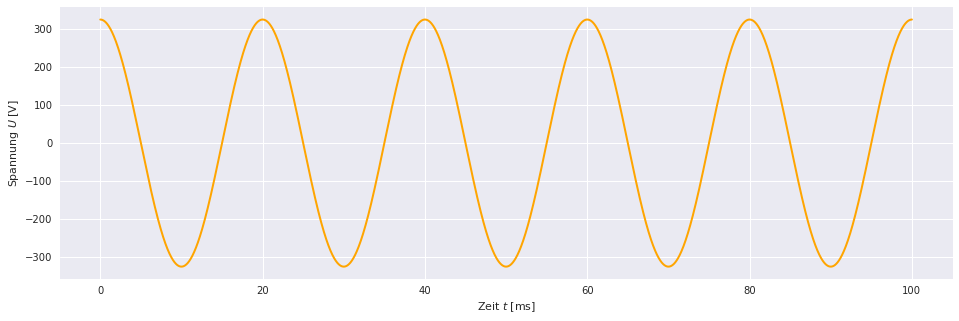

In [3]:
# Spannung im deutschen Stromnetz: Effektivwert 230 V
U = 230 # in Volt
udach = np.sqrt(2)*230 # Amplitude der Spannung
f = 50 # Frequenz in Hertz
# betrachteter Zeitraum
t = np.linspace(0,1e-3*100,5000) # 100 ms
# Spannungssignal ohne Störungen
u = udach*np.cos(2*np.pi*f*t)
# Diagramm
plt.plot(1e3*t,u,lw=linw,color=lincol)
plt.xlabel('Zeit $t$ [ms]')
plt.ylabel('Spannung $U$ [V]')

<div class="alert alert-block alert-info"><b>Ausprobieren: </b>
Was passiert, wenn Sie die Frequenz erhöhen? Ändern Sie den Wert in der Code-Zelle, drücken Sie Shift-Enter, um es auszuprobieren.</div>

*Antwort: Wenn die Frequenz höher ist, dann ...*

<div class="alert alert-block alert-info"><b>Frage: </b>
Warum schwingt die Spannung nicht zwischen plus und minus 230 V?</div>

*Antwort: Die 230 V sind der Effektivwert der Spannung. Das bedeutet ...*

Nun definieren wir drei Ströme, wie sie gemessen werden könnten:
1. $i_a$ ein Gleichstrom
2. $i_b$ ein sinusförmiger Strom der Frequenz 50 Hz
3. $i_c$ ein Strom mit starkem Oberwellen-Anteil

In [4]:
# ia
Ia = 1 # in Ampère
ia = Ia*np.ones(len(t)) # zu jedem Zeitpunkt Ia
# ib
ib = Ia*np.sqrt(2)*np.cos(2*np.pi*f*t + np.pi/4)
# ic
ic = Ia*np.sqrt(2)*np.cos(2*np.pi*f*t + np.pi/4) + 0.5*Ia*np.sqrt(2)*np.cos(4*np.pi*f*t + np.pi/8) + 0.25*Ia*np.sqrt(2)*np.cos(8*np.pi*f*t + np.pi/16)

<div class="alert alert-block alert-info"><b>Aufgabe: </b>
Stellen Sie die drei Ströme in einem Diagramm dar. Nutzen Sie dafür das Code-Beispiel für die Spannung und ergänzen Sie einfach nach dem ersten plot-Befehl zwei weitere Zeilen mit den beiden weiteren plot-Befehle für die beiden anderen Ströme. </div>

*Antwort: Es lässt sich beobachten, dass die Ströme $i_a$, $i_b$ und $i_c$ sich folgendermaßen verhalten ...*

Bei periodischen Signalen (Periode $T=1/f$ = Wiederholfrequenz) lässt sich die Wirkleistung als Mittelwert der Augenblicksleistung bestimmen:

\begin{equation}
P = \bar{p(t)} = \frac{1}{T}\int_0^T p(t)dt
\end{equation}

Diese Formel gilt für analoge Signale. Da wir in python mit zeitdiskreten Signalen arbeiten, d.h. Signalen, die  nur zu gewissen Zeitpunkten $t_i$ mit einem Wert hinterlegt sind, verändert sich die Formel zu: 

\begin{equation}
P = \bar{p(t)} = \frac{1}{T}\int_0^T p(t)dt \approx \frac{1}{n}\sum_{t_i=t_1}^{t_i=t_n} p_i(t_i)
\end{equation}

In [5]:
# Mittelwert der Spannung
Umittel = np.mean(u)
print('Mittelwert der Spannung '+str(Umittel)+' V')

Mittelwert der Spannung 0.06505382386921264 V


Diese Formel könnten wir nun auf das Leistungssignal anwenden. Es gibt allerdings in python für sehr viele mathematische Operationen bereits vorbereitete Befehle. Hier ist der Befehl `np.mean()` sinnvoll. In der folgenden Code-Zeile ist er auf das Signal $u(t)$ angewendet zu sehen. Probieren Sie ihn auch für $i_a$, $i_b$ sowie $i_c$ und $p_a = u\cdot i_a$, $p_b$ und $p_c$ aus.

<div class="alert alert-block alert-info"><b>Frage: </b>
Wie kommt der Mittelwert der Spannung zustande? Ist der Wert korrekt? </div>

*Antwort: Der Wert ist nicht ganz korrekt, weil ... Wenn man ... verändert (wie?), kann man den Fehler reduzieren.*

<div class="alert alert-block alert-info"><b>Aufgabe: </b>
Ermitteln Sie die Mittelwerte der Ströme und der Leistungen, die sich hier ergeben (insgesamt 6 Werte). </div>

Die Wirkleistung entspricht der Leistung im Gleichstromkreis und wird in der Einheit Watt (W) angegeben. Die Wirkleistung **wirkt** und verursacht z. B. eine Temperaturerhöhung oder eine mechanische Kraft. Wenn die Effektivwerte von Strom $I$ und Spannung $U$ sowie die Phasenverschiebung $\varphi$ zwischen Spannung und Strom bekannt sind, so berechnet sich die Wirkleistung zu:

\begin{equation}
P = U\cdot I \cdot \cos\varphi
\end{equation}

<div class="alert alert-block alert-info"><b>Frage: </b>
Wie ist der Effektivwert eines Signals definiert?</div>

*Antwort: Berechnet man die Leistung über einem Ohmschen Widerstand mit dem Effektivwert, so ...*

Die mathematische Formel für den Effektivwert (der auch Quadratmittelwert heißt, engl. *root-mean-square (RMS)*): 

\begin{equation}
U_{eff} = U = \sqrt{\frac{1}{T}\int_0^T u^2(t) dt} \approx \sqrt{\frac{1}{nT}\sum_{t_i=t_1}^{t_i = t_n} u_i^2 (t_i)}
\end{equation}

Im Folgenden ist dies für die Spannung einmal als Code berechnet: 

In [6]:
Ueff = np.sqrt(np.mean(u**2))
print('rückgerechneter Effektivwert der Spannung ' +str(Ueff) + ' V')

rückgerechneter Effektivwert der Spannung 230.02299885011502 V


<div class="alert alert-block alert-info"><b>Aufgabe: </b>
Ermitteln Sie nun auch die Effektivwerte der drei Ströme und kommentieren Sie die Genauigkeit dieses Vorgehens. Berechnen Sie daraus auch die drei Wirkleistungen bei den drei Strömen und vergleichen Sie mit den oben ermittelten Werten.</div>

*Antwort:...*

Strom und Spannung sind nur bei rein ohmschen Verbrauchern in Phase. Treten kapazitive oder induktive Anteile hinzu, so wird ein Teil der Leistung im elektrischen bzw. magnetischen Feld zwischengespeichert  und zurück in den Stromkreis gespeist. Dieser Teil, der hin und her pendelt, heißt Blindleistung $Q$.

\begin{equation}
Q = U\cdot I \cdot \sin\varphi
\end{equation}

Die Blindleistung wird in der Einheit var (volt-ampere-reactive) angegeben. 

<div class="alert alert-block alert-info"><b>Aufgabe: </b>
Ermitteln Sie nun auch die Blindleistungswerte bei den drei Strömen.</div>

*Was beobachten Sie? Sind die ermittelten Werte sinnvoll?*

Die elektrische Arbeit, die verrichtet wird, wenn über einen gewissen Zeitraum $\Delta t = t_2 - t_1$ ein Wirkleistungsprofil $P(t)$ verbraucht oder erzeugt wird, ist:

\begin{equation}
W_{wirk} (\Delta t) = \frac{1}{\Delta t}\cdot\int_{t = t_1}^{t= t_2} P(t) dt \approx \frac{1}{\Delta t} \cdot \sum_{k=k_{t_1}}^{k=k_{t_2}} P(k_{t_k}) 
\end{equation}

<div class="alert alert-block alert-info"><b>Frage: </b>
Warum könnte sich die Wirkleistung über der Zeit verändern? Nennen Sie fünf verschiedene Möglichkeiten bei konkreten Geräten. Kann die Wirkleistung auch negativ werden?</div>

*Antwort: Die Wirkleistungsaufnahme ändert sich über der Zeit, wenn man folgendes tut:*
- Gerät ...: ...
- Gerät ...: ...
- Gerät ...: ...
- Gerät ...: ...
- Gerät ...: ...

Wir erzeugen nun ein sehr simples zeitlich variables Lastprofil für die Wirkleistungsaufnahme eines fiktiven Gerätes. 

Text(0,0.5,'Wirkleistungsaufnahme $P_x$ [W]')

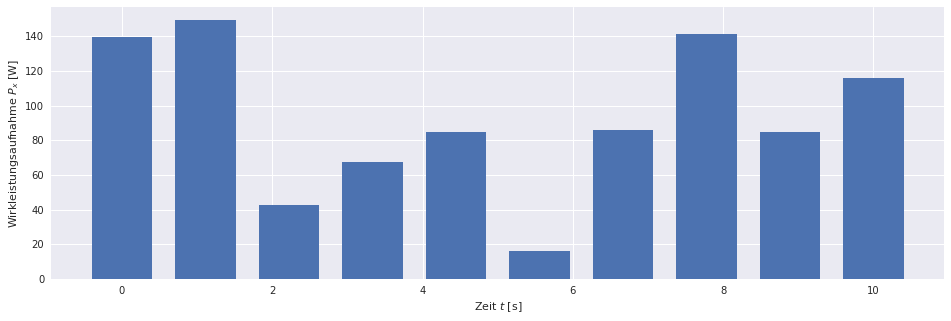

In [7]:
# neuer Zeitvektor
tx = np.linspace(0,10,10) # in Sekunden
# Wirkleistungsprofil: Zufallswerte
Px = 150*np.random.rand(len(tx))
plt.bar(tx,Px)
plt.xlabel('Zeit $t$ [s]')
plt.ylabel('Wirkleistungsaufnahme $P_x$ [W]')

Nun können wir mit diesem (sehr kurzen) Lastprofil einige Dinge berechnen: 
- die mittlere Wirkleistung mit dem Befehl `np.mean()`
- den Energieverbrauch mit dem Befehl `np.cumsum()`

In [8]:
Pxmittel = np.mean(Px)
print('die mittlere Wirkleistung beträgt '+str(Pxmittel)+' W')

die mittlere Wirkleistung beträgt 92.64120899097045 W


In [9]:
Wx = np.cumsum(Px)
print('die verbrauchte Energie beträgt '+str(Wx[-1])+' Ws')

die verbrauchte Energie beträgt 926.4120899097045 Ws


<div class="alert alert-block alert-info"><b>Frage: </b>
Wie viele Nachkommastellen machen Sinn für diese Angaben? Nutzen Sie den Befehl np.round(), um die Werte mit weniger Nachkommastellen einfacher lesbar darzustellen</div>

*Antwort: Die sinnvolle Anzahl der Nachkommastellen ist ..., weil ... Mehr Nachkommastellen sind nur sinnvoll, wenn man ...*

Ist der Strom nicht rein sinusförmig wie bei $i_b$ mit der Grundfrequenz $f=50\text{ Hz}$, sondern enthält auch Anteile höherer Frequenzen wie $i_c$, so tragen die Leitungen nicht nur die Feldblindleistung $Q$, sondern auch die Verzerrungsblindleistung $D$, da die höherfrequenten Ströme mit der Spannung nicht in Phase sein können und daher keine Wirkleistung erbringen können. Die Scheinleistung $S$ besteht dann aus

\begin{equation}
S = \sqrt{P^2+Q^2+D^2}\label{eq:reactivepower}
\end{equation}

Die Scheinleistung wird zur Unterscheidung in VA (Volt-Ampere) angegeben.

Ein beliebiger periodischer (d.h. sich wiederholender) Stromverlauf kann als Summe von Sinusfunktionen verschiedener Frequenz dargestellt werden.

\begin{equation}
i(t) = I_0 + \sum_{n=1}^\infty \hat{i_n} \cdot \cos(n\cdot \omega t + \varphi_n)
\end{equation}

In dieser Gleichung ist $I_0$ der Gleichanteil (Offset), $\hat{i_n}$ die Amplitude des Sinusanteils der Frequenz $f_n = n\cdot f$, $\omega=2\pi f$ die Kreisfrequenz und $\varphi_n$ die Phase des Sinusanteils der Frequenz $f_n$.

<div class="alert alert-block alert-info"><b>Frage: </b>
Wie groß ist der Effektivwert eines Sinussignals mit nur einer Frequenz $f$ als Funktion der Amplitude $\hat{i_n}$?</div>

*Antwort: $I_n = ...$*

Um den gesamten Effektivwert des Stromes $i$ zu berechnen, kann man entweder die obige Formel für den quadratischen Mittelwert verwenden, oder die geometrische Summe der einzelnen Effektivwerte heranziehen.

\begin{equation}
I^2 = I_0^2 + I_1^2 + I_2^2 + I_3^2 + ... = I_0^2 + \sum_{n=1}^\infty I_n^2
\end{equation}

Die Scheinleistung berechnet sich aus $S = U\cdot I$. Für die Wirkleistung gilt jedoch, dass nur der grundfrequente Strom einen Beitrag liefert:

\begin{equation}
P = U \cdot I_1 \cdot \cos\varphi_1
\end{equation}

Für diesen allgemeineren Fall ist der Leistungsfaktor $\lambda$ definiert aus messbaren Größen:

\begin{equation}
\lambda = \frac{P}{S}
\end{equation}

Es ergibt sich für die Grundschwingungsblindleistung (Feldblindleistung) $Q$:

\begin{equation}
Q = U\cdot I_1 \cdot \sin\varphi_1 
\end{equation}

Die Verzerrungsblindleistung $D$ ist:

\begin{equation}
D = \sqrt{U^2\cdot (I_0^2 + I_2^2 + I_3^2 + ...)}
\end{equation}

Der Grundschwingungsleistungsfaktor $\lambda_1$ ist zu unterscheiden vom gesamten Leistungsfaktor $\lambda$:

\begin{equation}
\lambda_1 = \frac{\vert P \vert}{S_1} = \cos\varphi_1
\end{equation}

\begin{equation}
\lambda = \frac{\vert P \vert}{S} \leq \cos\varphi_1
\end{equation}

<div class="alert alert-block alert-info"><b>Aufgabe: </b>
Ermitteln Sie nun die Wirkleistung beim Strom $i_c$. Ermitteln Sie ebenfalls die Feldblindleistung $Q$ und die Verzerrungsblindleistung $D$ sowie den gesamten Leistungsfaktor $\lambda$ und den Grundschwingungsleistungsfaktor $\lambda_1$.</div>

Das folgende Diagramm stellt die verschiedenen Leistungen für einen rein sinusförmigen Verbraucher mit Stromverlauf $i_b$ dar. 

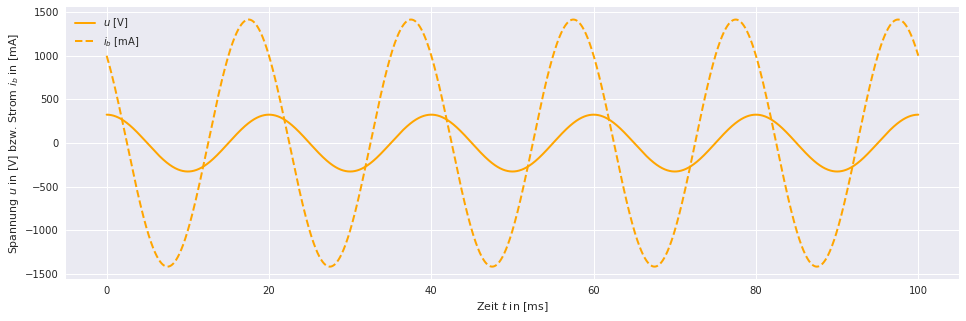

In [10]:
plt.plot(1e3*t,u,lw=linw,color=lincol,label='$u$ [V]')
plt.plot(1e3*t,1e3*ib,lw=linw,color=lincol,linestyle='--',label='$i_b$ [mA]')
plt.xlabel('Zeit $t$ in [ms]')
plt.ylabel('Spannung $u$ in [V] bzw. Strom $i_b$ in [mA]')
plt.legend()

Aus diesen Größen lassen sich die Leistungen bestimmen:

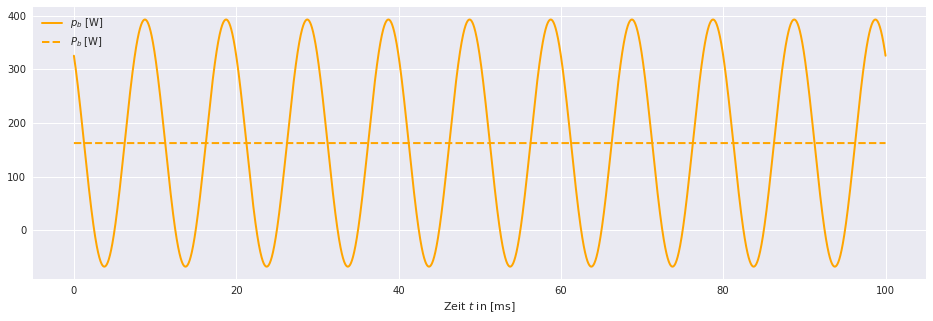

In [11]:
# ggf. pb hier mit # am Zeilenanfang auskommentieren, wenn oben schon berechnet
pb = u*ib
Pb = np.mean(pb)*np.ones(len(t))
plt.plot(1e3*t,pb,lw=linw,color=lincol,label='$p_b$ [W]')
plt.plot(1e3*t,Pb,lw=linw,color=lincol,linestyle='--',label='$P_b$ [W]')
plt.xlabel('Zeit $t$ in [ms]')
plt.ylabel('')
plt.legend()

<div class="alert alert-block alert-info"><b>Aufgabe: </b>
Stellen Sie nun ebenso den Strom $i_c$ mit der Spannung $u$ sowie die Leistung $p_c$ und $P_c$ dar. Was fällt auf?</div>

*Antwort: Es fällt auf, dass ...*

Als weitere Größe zur Beschreibung von Signalen $x(t)$ dient der Scheitelfaktor (engl. Crest Factor) $k_S$: 

\begin{equation}
k_S = \frac{\vert x_{max} \vert}{X_{eff}}
\end{equation}

In dieser Gleichung ist $\vert x_{max}\vert$ der betragsmäßige Maximalwert des Signals und $X_{eff}$ der Effektivwert.

<div class="alert alert-block alert-info"><b>Frage: </b>
Ermitteln Sie den Scheitelfaktor für die Ströme $i_a$, $i_b$ und $i_c$.</div>

*Antwort: $k_{S,a}=...$, $k_{S,b}=...$, $k_{S,c}=...$*

<div class="alert alert-block alert-info"><b>Frage: </b>
Welche Bedeutung für die Energieeffizienz haben Feldblindleistung und Verzerrungsblindleistung?</div>

*Antwort: ...*

### Beispielmessung mit dem Leistungsanalysator HMC8015

In [12]:
df=pd.read_csv('../data/IN130306.CSV',header=9,sep=';')

In [13]:
df.head()

Time[s]  Voltage[V]  Current[A]
0  0.000000     3.18196    0.046482
1  0.000004     3.60435    0.046581
2  0.000008     4.02673    0.046689
3  0.000012     4.39280    0.046727
4  0.000016     4.92782    0.046670

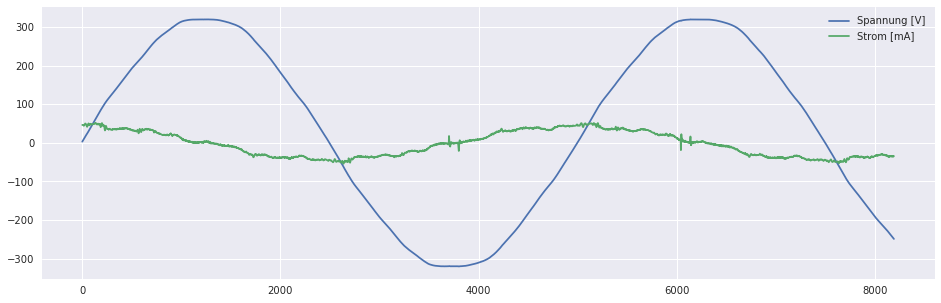

In [14]:
plt.plot(df['Voltage[V]'],label='Spannung [V]')
plt.plot(1e3*df['Current[A]'],label='Strom [mA]')
plt.legend(loc='best')

zeitlicher Abstand zwischen Messpunkten?

In [15]:
resolution=df['Time[s]'][1]-df['Time[s]'][0]
print('zeitlicher Abstand zwischen Messpunkten: '+str(1e6*resolution)+' µs')

zeitlicher Abstand zwischen Messpunkten: 4.0 µs


Messdauer?

In [16]:
duration=np.max(df['Time[s]'])
print('Messdauer '+str(np.round(1e3*duration,2))+' ms')

Messdauer 32.76 ms


Als Index nun die Zeit setzen

In [17]:
df=df.set_index('Time[s]')

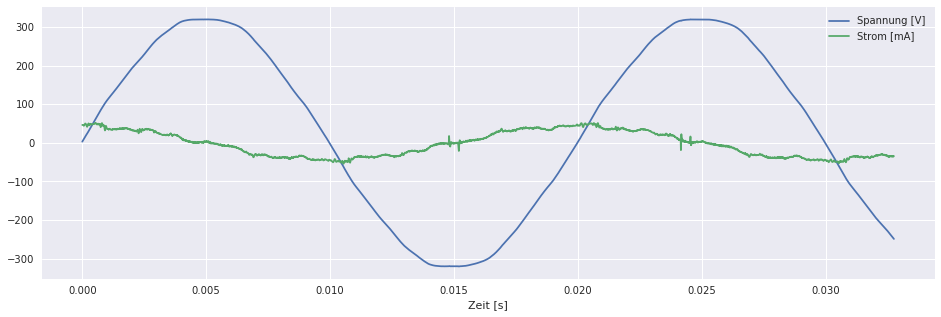

In [18]:
plt.plot(df['Voltage[V]'],label='Spannung [V]')
plt.plot(1e3*df['Current[A]'],label='Strom [mA]')
plt.xlabel('Zeit [s]')
plt.legend(loc='best')

Frequenz? sind das wirklich 50 Hz? sieht so aus

eine Periode ist also 
\begin{equation}\label{eq:periode}
T=\frac{1}{f}=\frac{1}{50\text{ Hz}}=20\text{ ms}
\end{equation}


In [19]:
T=1/50

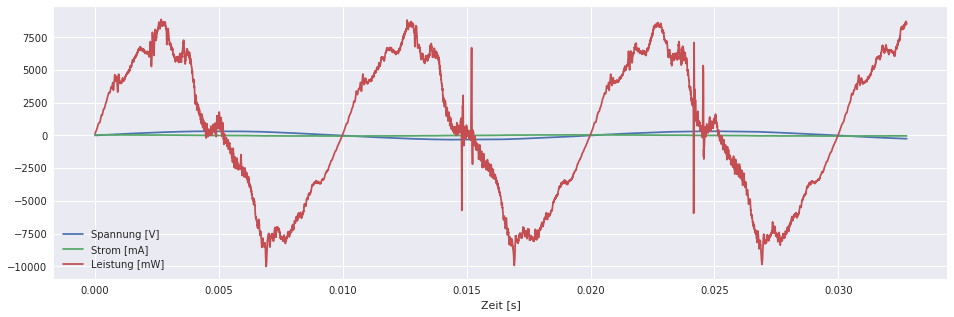

In [20]:
p=df['Voltage[V]']*df['Current[A]']
plt.plot(df['Voltage[V]'],label='Spannung [V]')
plt.plot(1e3*df['Current[A]'],label='Strom [mA]')
plt.plot(1e3*p,label='Leistung [mW]')
plt.xlabel('Zeit [s]')
plt.legend(loc='best')

Leistung oszilliert sinusförmig und hat Oberwellen (zick-zack-Formen)

was würde ein Energiezähler (der so genau alles mitmacht und nicht zu träge ist) sehen?

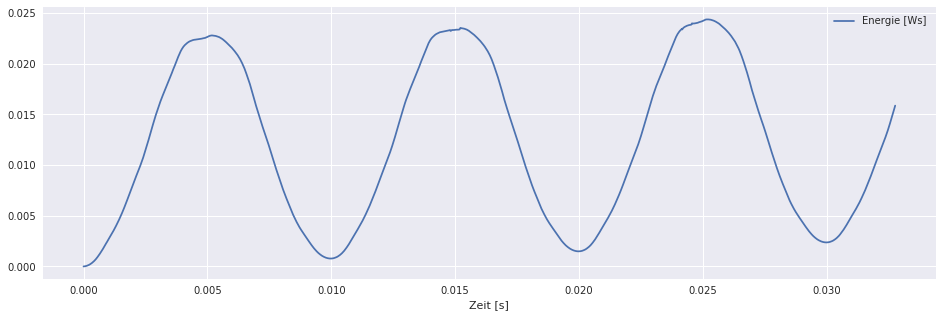

In [21]:
plt.plot(resolution*np.cumsum(p),label='Energie [Ws]')
plt.xlabel('Zeit [s]')
plt.legend(loc='best')

langsam aber sicher scheint die Energie zuzunehmen, d.h. da scheint ein Verbraucher zu sein

Wirkleistung = Mittelwert der Leistung

In [22]:
Pm=np.mean(p)
print('Ist ' +str(np.round(1e3*Pm,2))+ ' mW die korrekte Wirkleistung?')

Ist 484.12 mW die korrekte Wirkleistung?


Moment mal, das muss ja immer über einer Periode oder Vielfachen davon gemittelt werden, sonst stimmt es nicht!

<div class="alert alert-block alert-info"><b>Weiterführend für Ihre Projekte sicher hilfreich: </b>
wie man das rollierend, d.h. nicht für einen festen Zeitpunkt macht, sondern z. B. über die jeweils vom aktuellen Datenpunkt aus gesehen letzte Periode, erklärt z. B. der Blogpost \cite{brownlee_moving_2016}</div>

wir schneiden jetzt aus aus dem Datensatz die Werte von 4 µs bis 20 ms, dann haben wir eine Periode

In [23]:
dfT=df.loc[resolution:T]

Wirkleistung in dieser Periode

In [24]:
pT=dfT['Voltage[V]']*dfT['Current[A]']
P=np.mean(pT)
print('Korrekt ermittelte Wirkleistung ' +str(np.round(1e3*P,2)) +' mW')

Korrekt ermittelte Wirkleistung 74.52 mW


Effektivwert der Spannung nun berechnen:

In [25]:
U=np.sqrt(np.mean(dfT['Voltage[V]']**2))
print('Effektivwert der Spannung ' +str(np.round(U,2))+' V')

Effektivwert der Spannung 229.62 V


Effektivwert des Stroms nun berechnen:

In [26]:
I=np.sqrt(np.mean(dfT['Current[A]']**2))
print('Effektivwert des Stroms ' +str(np.round(1e3*I,2))+' mA')

Effektivwert des Stroms 31.55 mA


Scheinleistung in VA

In [27]:
S=U*I
print('Scheinleistung ' +str(np.round(S,2))+' VA')

Scheinleistung 7.24 VA


Vergleich mit der Wirkleistung: S >> P!

Grund: bei induktiven / kapazitiven Komponenten fließt der Strom zwischen diesen hin und her, wird im elektrischen bzw. magnetischen Feld zwischengespeichert und wieder entladen, trägt aber nicht zur Wirkleistung bei (die in thermische, mechanische, chemische, Lichtenergie, etc. gewandelt wird)

ohne Oberwellen gilt das als Dreiecksdarstellung 
<a title="Saure at German Wikipedia, CC BY-SA 3.0 &lt;http://creativecommons.org/licenses/by-sa/3.0/&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Leistung-PQS-Zeiger.svg"><img width="512" alt="Leistung-PQS-Zeiger" src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e8/Leistung-PQS-Zeiger.svg/512px-Leistung-PQS-Zeiger.svg.png"></a>

hier jetzt: Bestimmung der Blindleistung gesamt mit Formel \ref{eq:reactivepower} in der Einheit var

In [28]:
QundD=np.sqrt(S**2-P**2)
print('gesamte Blindleistung = Feldblindleistung Q plus Verzerrungsblindleistung D '+str(np.round(QundD,2))+' var')

gesamte Blindleistung = Feldblindleistung Q plus Verzerrungsblindleistung D 7.24 var


Leistungsfaktor berechnen

In [29]:
cosphi=P/S
print('Leistungsfaktor '+str(np.round(cosphi,2)))

Leistungsfaktor 0.01


wie groß ist der Phasenverschiebungswinkel $\varphi$ nun?

In [30]:
phi=np.arccos(cosphi)
print('Phasenverschiebungswinkel '+str(np.round(phi,2))+' rad')

Phasenverschiebungswinkel 1.56 rad


das ist in rad (Radiant), Grad geht auch

In [31]:
phiG=180*phi/np.pi
print('Phasenverschiebungswinkel '+str(np.round(phiG,2))+'°')

Phasenverschiebungswinkel 89.41°


da der Strom voreilt (sieht man an einem der ersten Diagramme), muss der Winkel negativ sein - es handelt sich um einen kapazitiven Verbraucher

In [32]:
phiG=-180*np.arccos(cosphi)/np.pi
print('Phasenverschiebungswinkel mit korrektem Vorzeichen ' +str(np.round(phiG,2))+'°')

Phasenverschiebungswinkel mit korrektem Vorzeichen -89.41°


Energieverbrauch über der Messzeit: Wirkleistung mal Messzeit (stimmt hier natürlich nicht ganz, denn wir haben nicht überprüft, ob in der nächsten Periode nach der ersten immer noch die gleiche Wirkleistung abgerufen wird, das müsste man dann für jede Periode machen, denn natürlich ändert sich die Wirkleistung auch über der Zeit, z. B. wenn ein Gerät angeschaltet und wieder ausgeschaltet wird)

In [33]:
E=P*duration
print('Energieverbrauch über der Messdauer '+str(np.round(1e3*E,2))+' mWs')

Energieverbrauch über der Messdauer 2.44 mWs


### Genauigkeit von elektrischer Energiemessung

<div class="alert alert-block alert-info"><b>Weiterführende Literatur: </b>
Thomas Mühl. Elektrische Messtechnik: Grundlagen, Messverfahren,  Anwendungen. de. 5., überarbeitete und erweiterte Auflage. Lehrbuch. OCLC: 964673854. Wiesbaden: Springer Vieweg, 2017. isbn: 978-3-658-15719-7
978-3-658-15720-3. (mit cisco VPN auf springerlink im Netz der TH verfügbar) \cite{muhl_elektrische_2017}
</div>

**True RMS** meint: unabhängig von der Signalform die Messung des richtigen Effektivwertes (z. B. digitale Berechnung, elektronische Messung, Messung mit Dreheiseninstrument bzw. mit therm. Umformer) statt indirekter (billigerer) Messung des Gleichrichtwertes und Umrechnung mit einem Faktor, der nur für rein sinusförmige Größen gilt

- Abtastrate: wie oft wird ein Messwert ausgelesen? Shannon: mind. doppelte Frequenz des Signals, d.h. hohe Abtastrate wichtig für hohe Oberwellenanteile
- True RMS vs. RMS - siehe voriger Absatz
- zeitliche Auflösung: kurze Vorgänge benötigen höhere Auflösung als langsame Vorgänge (z. B. Wasserkocher an vs. Beleuchtungsprofil)
- zeitliche Mittelung der Messwerte: für die Bewertung von Leistungsspitzen benötigt man eine hohe zeitliche Auflösung (z. B. Anlaufströme)
- spezifisch für das Messprinzip und die Messdatenwandlung wirken weitere Faktoren auf die Genauigkeit, z. B. wenn nur der Strom mithilfe einer Stromzange gemessen wird und die Spannung konstant angenommen wird

<div class="alert alert-block alert-info"><b>Aufgabe: </b>
Fassen Sie zusammen, was Sie aus den python-Profilen gelernt haben: in welcher Größenordnung ergeben sich jeweils Fehler durch welche Parameter-Einstellungen? Wie kann man diese vermeiden oder reduzieren?</div>

*Antwort: ...*

### Messung der Wechselstromleistung und -energie

<div class="alert alert-block alert-info"><b>Weiterführende Literatur: </b>
Reinhard Lerch. Elektrische Messtechnik: Analoge, digitale und computergestützte Verfahren. 7., aktualisierte Auflage. Berlin und Heidelberg: Springer Vieweg, 2016. isbn: 978-3-662-46941-5. doi: 10.1007/978-3-662-46941-5 \cite{lerch_elektrische_2016} (mit cisco VPN auf springerlink im Netz der TH verfügbar)
</div>

Die elektrische Leistung lässt sich mit einem elektrodynamischen Messwerk oder mit einem **digitalen Leistungsmesser** messen: Strom und Spannung werden separat gemessen und digitalisiert. Die Analog-Digital-Umwandlung erfolgt bei Verbrauchern an 50 Hz typischerweise mit Abtastraten von 50 kHz, d.h. das analoge Signal wird alle 20 μs digitalisiert. Der Signalprozessor berechnet daraus die Effektivwerte von Strom und Spannung und bestimmt den Phasenwinkel. Ebenso kann er bereits Wirk-, Blind- und Scheinleistung sowie den Leistungsfaktor berechnen.

<div class="alert alert-block alert-info"><b>Frage: </b>
Was passiert, wenn ein Signal weniger häufig als 50 kHz gemessen wird? Welche Effekte auf die Messgenauigkeit ergeben sich dadurch? Für welche Art von Verbrauchern könnte dies besonders relevant sein?
</div>

*Antwort:...*

![Messkette](img/messkette.png)

Die Abbildung beinhaltet die Funktionsweise eines digitalen Leistungsmessers: separate Strom- und Spannungsmessung, galvanische Trennung (Transformator), Verstärker, Analog-Digital-Umsetzung (A/D) und (zumeist gemeinsamer) Prozessor, ggf. mit Anzeige.

Zur Beurteilung der möglichen Messgenauigkeit ist die gesamte Messkette zu  betrachten: Jeder Messschritt aus dem obigen Schema sowie die Verbindungstechnik dazwischen kann mit Unsicherheiten behaftet sein. Für das Messgerät an sich finden sich Angaben zur Messgenauigkeit im Datenblatt. Zudem können Daten aus bereits erfolgten Kalibrationen herangezogen werden. Zur Interpretation der Messgenauigkeit siehe auch den separaten Abschnitt weiter unten.

Die Ohmschen Verluste in den Anschlusskabeln lassen sich mithilfe der Länge $l$, dem Querschnitt $A$ und dem spezifischen Widerstand von Kupfer $\rho_{Cu} (\vartheta = 20°C) = 1,7\cdot 10^{-2} \cdot \text{mm}^2/\text{m}$ abschätzen.  *Hinweis: elektrische Leitungen von typischen Verbrauchern haben genormte Querschnitte, gehen Sie von $A=1,5 \text{mm}^2$ aus, falls Sie keine Information dazu finden.*

\begin{equation}\label{eq:}
R_L = \rho_{Cu}\cdot \frac{l}{A}
\end{equation}

Das bedeutet, dass in den Leitungen die Leistung $P=I^2 \cdot R_L$ als Wärme entsteht. Beachten Sie, dass es immer einen Hin- und einen Rückleiter geben muss, damit der Stromkreis geschlossen ist!

<div class="alert alert-block alert-info"><b>Aufgabe: </b>
Berechnen Sie, welcher Leitungswiderstand sich bei dem Standardquerschnitt für die Leitungslängen $l_1 = 1\text{ m}$, $l_2 = 10\text{ m}$ und $l_3 = 100\text{ m}$ ergibt und bestimmen Sie die zugehörigen Wärme-Verluste in Watt für die Ströme $i_a$, $i_b$ und $i_c$.</div>

*Antwort:...*

<div class="alert alert-block alert-info"><b>Frage: </b>
Was hat der elektrische Leitungswiderstand mit Energieeffizienz zu tun? Wann muss er berücksichtigt werden, wann kann er vernachlässigt werden?</div>

*Antwort:...*

Ein weiterer Aspekt ist, ob die Spannung überhaupt separat gemessen wird. Es gibt Leistungsmessgeräte, die man auf Leitungen aufklipsen kann (siehe das Beispiel im Bild). 

![Clampmeter Fluke 337](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Clampmeter_Fluke_337.jpg/256px-Clampmeter_Fluke_337.jpg) *Harke / Public domain, https://upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Clampmeter_Fluke_337.jpg/256px-Clampmeter_Fluke_337.jpg*

<div class="alert alert-block alert-info"><b>Frage: </b>
Warum ist es relevant, ob die Spannung überhaupt gemessen wird? Welchen Fehler macht man dadurch bei der Leistungsmessung?</div>

*Antwort:...*

Ebenso ist die Art der Strommessung mit Unsicherheiten behaftet: Bei den Stromsensoren existieren drei Messmethoden: 
- Die Messung der Spannung über einen Parallelwiderstand (sog. Shunt) ist am genauesten, wenn es sich um einen sehr genau kalibrierten Shunt handelt. Nachteilig ist, dass ein Eingriff in den Stromkreis notwendig ist, um den Shunt einzubauen. Daher nutzen die meisten Energiemanagement-Messysteme eine der beiden anderen Messmethoden, die berührungslos mit Stromzangen oder Leiterschleifen arbeiten können.
- Die sog. Rogowski-Spule oder Übertrager-Stromzange besteht aus einer ringförmigen Spule, die eine Aussparung besitzt, um das Kabel einzuführen. Wechselstrom induziert über das wechselnde Magnetfeld eine Spannung in dieser Spule, die wiederum gemessen werden kann.
- Alternativ lässt sich eine Hall-Sonde verwenden, die auch Gleichströme messen kann.

Leistungsmessgeräte, die in der Lage sind, auch nichtsinusförmige Ströme zu messen, heißen Leistungsanalysatoren. Sie haben eine aufwendigere Messelektronik, um Abtastraten bis 100 kHz zu ermöglichen.

### Messgenauigkeit

<div class="alert alert-block alert-info"><b>Weiterführende Literatur: </b>
    
- Reinhard Lerch. Elektrische Messtechnik: Analoge, digitale und computergestützte Verfahren. 7., aktualisierte Auflage. Berlin und Heidelberg: Springer Vieweg, 2016. isbn: 978-3-662-46941-5. doi: 10.1007/978-3-662-46941-5 \cite{lerch_elektrische_2016} (mit cisco VPN auf springerlink im Netz der TH verfügbar)
- Jörg Hoffmann (Hrsg.). Taschenbuch der Messtechnik: Mit 62 Tabellen. 4., akt. u. erg. Aufl., München: Fachbuchverl. Leipzig im Carl Hanser Verl., 2004. isbn: 9783446228603 \cite{hoffmann_taschenbuch_2015}
</div>

Ein ideales Messsystem würde den wahren Wert der Messgröße $x_w$ als Messwert $x_m$ wiedergeben. Damit wäre der absolute Messfehler $e = x_ m - x_w$ Null. Je nachdem, ob die Messgröße kleiner oder größer als der wahre Wert ist, hat der absolute Messfehler ein positives oder negatives Vorzeichen. Der absolute Messfehler besitzt dieselbe Einheit wie die Messgröße. Der relative Fehler $e/x_w$ bezieht sich auf den wahren Wert. Der reduzierte Fehler $e/(x_{m,max} - x_{m,min})$ dient zur Einordnung der Fehlerklasse und bezieht sich auf den minimalen Messbereichswert $x_{m,min}$ und den maximalen Messbereichswert $x_{m,max}$ und somit auf die Messbereichsspanne. Häufig schreibt man $x_m \pm e$, wenn der absolute Fehler in beide Richtungen gleich groß ist. Dies ist insofern irreführend, als ja nicht bei jeder Messung der maximal mögliche Messfehler auftritt. Die meisten Messwerte liegen näher am wahren Wert als es der Grenzfehler suggeriert.

<div class="alert alert-block alert-info"><b>Diskussionsfrage: </b>
Diskutieren Sie in Ihrem Projektteam oder zusammen mit Kurskollegen aus SYE: Was ist der Unterschied zwischen Messunsicherheit und Messfehlern? Finden Sie Beispiele für beides.</div>

*Antwort: Messunsicherheit ist ... (z. B. ...) und Messfehler ist ... (z. B. ...)*

Generell existieren unterschiedliche Fehlerarten. Sogenannte **grobe Fehler**, also Fehler, die auf Irrtümern beruhen, werden nicht näher betrachtet, da solche Messergebnisse nicht verwendet werden sollen. Weitere Fehlerarten sind im Folgenden beispielhaft genannt, soweit sie für die Leistungs- oder Energiemessung relevant sind:
- **Quantisierungsfehler**: Jedem Digitalwert ist ein Bereich von Analogwerten zugeordnet. Beispiel: Bei einer Quantisierung in 1 bit in einem Messbereich von 1 V würde ein analoger Messwert von 0,7 V bei der Analog-Digital-Wandlung zum Wert 1 V führen. Der Fehler beträgt somit 0,3 V. Der Quantisierungsfehler kann durch eine höhere Auflösung (mehr Bit) verringert werden: Würde man im Beispiel eine Quantisierung in 2 bit durchführen, d.h. in die möglichen Werte 0 V; 0, 33 V; 0, 66 V; 1 V, so würde der genannte Messwert von 0,7 V digital als 10 oder 0,66 V dargestellt werden. Der Quantisierungsfehler würde damit 0,04 V betragen. Allgemein lässt sich der Quantisierungsfehler $e_Q$ darstellen als $\pm e_Q = \frac{1}{2}\cdot \frac{x_{m,max} - x_{m,min}}{2^{Anzahl Bits}}$.

<div class="alert alert-block alert-info"><b>Aufgabe: </b>
Auch bei künstlich erzeugten numerischen Profilen wie z. B. $u$ in diesem Notebook gibt es Quantisierungsfehler. Ermitteln Sie den Quantisierungsfehler von $u$.</div>

*Antwort: Der Quantisierungsfehler von $u$ beträgt ... Er hängt ab von ...*

- **Dynamische Fehler**: Das dynamische Verhalten eines Messsystems beschreibt die Abhängigkeit des Messwerts $x_m$ vom wahren Wert der Messgröße $x_w$ bis zum Erreichen des stationären Zustands des Systems. Wie lange dauert es, bis das Messergebnis mit vertretbarem Fehler ablesbar wird? Wie schnell darf sich die Messgröße verändern, um bei vertretbarem Fehler den Verlauf noch verfolgen zu können? Als Beispiel sei genannt, dass der Leistungsanalysator HMC8015, der im Versuch 2 zum Einsatz kommt laut Herstellerangaben eine Stunde benötigt, bis er diejenige Betriebstemperatur erreicht hat, bei der die angegebenen Genauigkeitswerte gelten.

<div class="alert alert-block alert-info"><b>Frage: </b>
Wie ist das bei elektrischen Verbrauchern? Wie unterscheidet sich der Verbrauch beim Einschalten und im Dauerbetrieb? Was bedeutet das für die Messungen für Ihre Projekte? Sind das Messfehler oder wollen wir dieses Verhalten auch messen?</div>

*Antwort:...*

- **Systematische Fehler** $e_s$: Bei wiederholten Messungen ergibt sich eine reproduzierbare Differenz zwischen Messwert $x_m$ und wahrem Wert der Messgröße $x_w$. Diese Differenz kann über den gesamten Messbereich unterschiedlich groß sein und ist somit an jedem Punkt reproduzierbar. Diese Fehler sind korrigierbar. Ein Beispiel für einen systematischen Messfehler ist die Versorgung des Energiemessgerätes im Verbrauchspfad (der gemessen wird). Dadurch wird der Eigenverbrauch des Messsystems mitgemessen. Ein anderes Beispiel sind Stromfehlerschaltung und Spannungsfehlerschaltung, die jeweils den Innenwiderstand des Strommessgerätes bzw. des Spannungsmessgerätes mit in der Messung verwenden, so dass eine systematische Abweichung entsteht.

<div class="alert alert-block alert-info"><b>Frage: </b>
Wie können Sie überprüfen, ob das Leistungsmessgerät die Leistung eines Verbrauchers mit oder ohne Eigenverbrauch angibt?</div>

*Antwort:...*

- **Zufällige Fehler** $e_r$: Zufällige Fehler lassen sich nicht reproduzieren, sondern bei wiederholten Messungen einer vermeintlich gleich bleibenden Größe streuen die Messwerte um einen Mittelwert. Der zufällige Fehler kann mit Amplitude, Vorzeichen oder Zeitpunkt des Auftretens nur teilweise vorhergesagt werden. Beispiele sind Betriebsspannungsschwankungen oder das Rauschen elektronischer Bauelemente oder von verschmutzten Kontakte . Zufällige Fehler lassen sich nicht korrigieren. Sie werden statistisch beschrieben. In der Regel geht man von einer Normalverteilung der Messwerte um einen Mittelwert aus.

<div class="alert alert-block alert-info"><b>Frage: </b>
Nennen Sie mindestens zwei Beispiele für zufällige Messfehler. Recherchieren Sie auch deren Größenordnung.</div>

*Antwort:...*

Zufällige und systematische Messfehler treten im Messwert als gemeinsame Größe auf:

\begin{equation}
e = e_s + e_r
\end{equation}

Zur Trennung der beiden Parameter dient eine Kalibration: An möglichst vielen Punkten des Messbereichs finden mehrfache Messungen unter gleichen Bedingungen statt. Dabei wird eine bekannte Größe, z. B. ein Kalibriernormal gemessen. Je höher die Anzahl der Messungen, desto kleiner ist der Vertrauensbereich (Konfidenzintervall) bei vorgegebenem Vertrauensniveau (Konfidenzniveau). Der Mittelwert der Einzelmessungen $\bar{x_m}$ dient als Erwartungswert für den unkorrigierten Messwert $x_{m,u}$. Die Streuung $s_m$ spiegelt den zufälligen Fehleranteil. Der systematische Fehleranteil berechnet sich aus $e_s = \bar{x_m} - x_w$, wobei für $x_w$ der Wert des Kalibriernormals eingesetzt wird. Nach Klärung der systematischen Fehler kann eine Kennlinienkorrektur stattfinden, bei der die systematischen Fehleranteile korrigiert werden.

Wir konstruieren nun ein kurzes fiktives Messsignal aus wahrem Wert und Fehler. Dann kalibrieren wir es mit einem fiktiven Kalibriernormalwert. Als Beispielmessung dient die Temperaturmessung mit einem [analogen Thermometer](https://de.wikipedia.org/wiki/Datei:Thermometer.JPG).

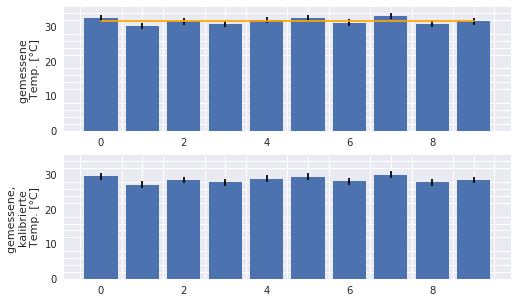

In [34]:
n = np.arange(10) # 10 Messpunkte
TCelsiusW = 30*np.ones(len(n)) # 10 Ablesewerte als wahre Werte
eCelsiusS = 3 # systematischer Fehler: Thermometeranzeige ist um 3 Grad verrutscht
eCelsiusR = 1*(np.random.randn(len(n))-1) # Parallaxenfehler: schiefes Ablesen
eCelsius = eCelsiusS + eCelsiusR
TCelsiusM = TCelsiusW + eCelsiusS + eCelsiusR
kCelsiusW = 3 # Kalibriernormalwert
TCelsiusMittel = np.mean(TCelsiusM)
sCelsiusM = np.sqrt((1/(np.max(n)-1))*np.sum((TCelsiusM - TCelsiusMittel)**2))
rcParams["figure.figsize"] = [8,5]
ax1=plt.subplot(2,1,1)
plt.bar(n,TCelsiusM,yerr=sCelsiusM)
plt.plot(n,TCelsiusMittel*np.ones(len(n)),color=lincol)
plt.ylabel('gemessene \nTemp. [°C]')
plt.minorticks_on()
plt.grid(which='both')

ax2=plt.subplot(2,1,2,sharex=ax1,sharey=ax1)
plt.bar(n,TCelsiusM-kCelsiusW,yerr=sCelsiusM)
plt.ylabel('gemessene, \nkalibrierte \nTemp. [°C]')
plt.minorticks_on()
plt.grid(which='both')

<div class="alert alert-block alert-info"><b>Frage: </b>
Was fällt auf? Kann man die Kalibration durch eine Mittelwertbildung vieler Messwerte ersetzen? Warum (nicht)?</div>

*Antwort:...*

Bei der Leistungsmessung und der Energiemessung ist zudem die Fehlerfortpflanzung zu beachten. Das Messgerät errechnet das Messergebnis zumeist aus separaten Strom-, Spannungs- und Zeitmessungen. Das errechnete Messergebnis $f(x_1, x_2, ..., x_k)$ besitzt also die Kombination aller auftretenden Messfehler $e_1, e_2, e_3, ...$. Das **Gaußsche Fehlerfortpflanzungsgesetz** kann für zufällige oder maximale Fehler Anwendung finden:

- **Fehlerfortpflanzung für zufällige Fehler**: Sind die Standardabweichungen $s_1, s_2, s_3, ...$ der Einzelwerte $x_1, x_2, x_3, ...$ bekannt, so gilt $s_m = \sqrt{\sum_{j=1}^k\left(\frac{\partial f}{\partial x_j}\cdot s_j\right)^2}$. Häufig vereinfacht man diese Betrachtung mit der Annahme, dass die Einzelfehler $\Delta x_j$ mittlere Fehler darstellen. Daraus ergibt sich der mittlere zu erwartende Fehler $\Delta x_m = \sqrt{\sum_{j=1}^k\left(\frac{\partial f}{\partial x_j}\cdot \Delta x_j\right)^2}$.
- **Fehlerfortpflanzung für maximale Fehler**: Für die Fortpflanzung von Fehlergrenzen ist vom ungünstigsten denkbaren Fall auszugehen, d.h. alle Ableitungen sind durch Absolutbeträgte zu ersetzen und es gilt für den resultierenden Maximalfehler $\Delta \hat{x_m} = \sum_{j=1}^k\left(\vert\frac{\partial f}{\partial x_j} \cdot \Delta x_j\vert\right)$. Maximalwerte von Einzelfehlern sind extrem selten. Dass nun alle Einzelwerte zugleich maximal werden, ist nahezu unwahrscheinlich.

<div class="alert alert-block alert-info"><b>Frage: </b>
Wo spielt die Fehlerfortpflanzung für Energieeffizienz-Betrachtungen eine Rolle? Nennen und erklären Sie stichpunktartig mindestens ein Beispiel.</div>

*Antwort:...*

Der Messbereich ist derjenige Bereich, in welchem sich eine Messgröße ändern kann, ohne dass die vorgegebene Fehlergrenze überschritten wird. Der Anzeigebereich kann größer als der Messbereich sein.
<br><br>
Das Auflösungsvermögen stellt die kleinste, mit einem Messgerät noch nachzuweisende Eingangsgrößenänderung dar. Es ist häufig so, dass die Messfehler größer sind als das Auflösungsvermögen. Die Klassengenauigkeit und die Garantiefehlergrenze sind Angaben des Herstellers: Er garantiert, dass mögliche Messfehler bei bestimmten Bedingungen innerhalb dieser Grenzen liegen. Die Garantiefehlergrenze gibt dabei die äußerste Abweichung an. Beispiel: Der Hersteller gibt Fehlerklasse 1 für ein Spannungsmessgerät mit dem Messbereich 0 bis 100 V an. Bei angezeigten 100 V beträgt die Garantiefehlergrenze 100 V $\pm$ 1 V, bei angezeigten 10 V beträgt sie 10 V $\pm$ 1 V. Daher ist es sinnvoll, einen Messbereich möglichst gut auszunutzen.

<div class="alert alert-block alert-info"><b>Frage: </b>
Auch bei künstlich erzeugten Lastprofilen ergibt sich eine Auflösungsgrenze durch die numerischen Fähigkeiten des Rechners. Ermitteln Sie diese Auflösungsgrenze, indem Sie herausfinden, wie groß die kleinste Zahlendifferenz auf Ihrer python-Installation eingestellt ist. Was bedeutet das für die Genauigkeit Ihrer Daten?</div>

*Antwort: Die Genauigkeitsgrenze beträgt ... und das bedeutet ...*

## Praktikum Versuch 1: Energielogger einsetzen

<div class="alert alert-block alert-warning"><b>Wichtig: Energielogger direkt nach dem Erhalt testen und zum vereinbarten Termin zurückgeben oder -senden! </b>Es gibt manchmal Probleme mit den Energieloggern. Dann kann ich Ihnen ein Ersatzgerät ausleihen. Damit das klappt, müssen Sie sich bis eine Woche nach Erhalt melden. D.h. <b>testen Sie, ob das Gerät sinnvolle Daten misst (siehe Anleitung hier) und ob Sie die Daten übertragen können auf Ihren PC (und ob diese Sinn machen)</b>. Wer sich nicht rechtzeitig meldet, kann keine sinnvollen Daten messen und muss damit rechnen, dass er dann diese Daten auch nicht sinnvoll im Projekt nutzen kann, was also die Note im Projekt verschlechtern kann. Auch für diesen Versuch ist es notwendig, <b>im Projektteam einen Versuchsplan abzustimmen</b>, denn auch Ihre frei einteilbare Zeit während des Semesters ist ja begrenzt und es ist wichtig, dass Sie gut absprechen, wer welche Messungen macht. Planen Sie außerdem Zeit ein, um ggf. unplausible Messungen zu wiederholen.</div>
<div class="alert alert-block alert-warning"><b>Beachten Sie die Sicherheitshinweise zu Versuch 2 (siehe weiter unten im Text)!</b>
</div>
<div class="alert alert-block alert-warning"><b>Notwendige Software bzw. Hardware: </b>

- python und jupyter notebook für Notizen mit Auswertung
- Tabellenkalkulationssoftware (MS Excel oder LibreOffice Calc oder ähnliche)
- USB-Stick, um Messdaten zu sichern
- voltcraft Energielogger Software (Link s.u.)
- SD-Kartenleser
</div>

<div class="alert alert-block alert-info"><b>Weiterführende Literatur: </b>

- [Voltcraft Energielogger 4000 Bedienungsanleitung](https://asset.conrad.com/media10/add/160267/c1/-/gl/000125444ML02/bedienungsanleitung-125444-voltcraft-energy-logger-4000-energiekosten-messgeraet-stromtarif-einstellbar-kostenprognose.pdf) \cite{conrad_bedienungsanleitung_2020}
- [Voltsoft Standard Auswerte-Software](https://asset.conrad.com/media10/add/160267/c1/-/gl/000125444DL01/download-125444-voltcraft-energy-logger-4000-energiekosten-messgeraet-stromtarif-einstellbar-kostenprognose.zip)
- [Voltsoft Benutzerhandbuch](https://asset.conrad.com/media10/add/160267/c1/-/de/001435090ML01/bedienungsanleitung-1435090-temperatur-datenlogger-voltcraft-dl-200t-30-bis-60-c-pdf-funktion-kalibriert-nach-werksstandard-ohne-zertifi.pdf) \cite{conrad_voltcraft_2020}
</div>

Laden Sie sich die obigen Bedienungsanleitungen und die Software herunter. Das Gerät ist ein Energiekostenmessgerät Energy Logger 4000 der Marke Voltcraft (Hausmarke der Firma Conrad). 

Sie bekommen folgende Dinge ausgeliehen:
- Energy Logger 4000
- SanDisk SD-Karte 16 GB
- Knopfzelle (Batterie)
- Verpackung für den Energy Logger, bestehend aus Karton und Luftpolsterfolie
- Bedienungsanleitung für den Energy Logger
- Software

<div class="alert alert-block alert-warning"><b>Wichtig: Alles pfleglich behandeln und pünktlich zurückgeben! </b>Behandeln Sie alle ausgeliehenen Dinge während der Ausleihdauer pfleglich und setzen Sie das Gerät nur bestimmungsgemäß (wie in der Bedienungsanleitung beschrieben) ein. Geben Sie <b>alle oben genannten</b> Dinge auch wieder zurück. Sollte Ihnen ein Gerät oder die Elektroinstallation nicht vertrauenswürdig erscheinen, so darf der Energielogger nicht eingesetzt werden. Beachten Sie die Bedienungsanleitung. Geben Sie das Gerät nicht an andere weiter und verwenden Sie es nur selbst. Dass Sie das Gerät mitsamt dem genannten Zubehör wieder zurück geben und es in der Zwischenzeit bestimmungsgemäß einsetzen, dafür unterschreiben Sie in der hier verlinkten <a href="log/SYEenergieloggerausleihe.pdf">Erklärung</a>. Diese laden Sie in ilias hoch (Corona-Semester) bzw. geben Sie bei der Ausleihe ab (Präsenz).</div>

**Inbetriebnahme des Energieloggers**: 
- Setzen Sie als erstes die Pufferbatterie und die SD-Karte ein. 
- Folgen Sie dann der Beschreibung in der Bedienungsanleitung ab Seite 11 zur Einstellung von Geräte-ID und Zeit. 
- Löschen Sie außerdem den Datenspeicher MEM, da sonst Messdaten von früheren Versuchen bei der Auswertung zu Verwirrung führen könnten. Drücken Sie dafür die Taste MODE für mindestens 3 Sekunden. Der leere Datenspeicher wird mit der Anzeige MEM99% signalisiert.
- Nach der Inbetriebnahme schließen Sie nun nacheinander einen oder mehrere Verbraucher an und nehmen Sie ein Lastprofil auf. 
- Zur erstmaligen Datenübertragung benötigen Sie die voltsoft Software (Link s.o.), installiert auf Ihrem Computer
- Übertragen Sie die Messdaten wie in der Bedienungsanleitung beschrieben vom internen Speicher des Energieloggers auf die SD-Karte.
- Rechnen Sie bei längeren Lastprofilen damit, dass dieser Vorgang einige Minuten in Anspruch nehmen kann.
- Lesen Sie nun die Daten von der SD-Karte in die voltsoft-Software ein. Folgen Sie der Anleitung in der Hilfe-Datei. 
- Wichtig ist, in den Einstellungen im Menü des Energieloggers, die Logger ID einzustellen.
- Danach laden Sie die Daten herunter, indem Sie das Laufwerk anwählen, das die SD-Karte in Ihrem Rechner darstellt.
- Als nächstes wählen Sie unter Darstellung die gesamte Speicherkapazität aus (von minimalem bis maximalem Datum).
- Darauf können Sie die Daten als CSV exportieren.
- Setzen Sie danach die SD-Karte wieder im Logger ein, so dass dieser immer einsatzbereit ist.
- *In ilias ist auch ein vorläufiges, unvollständiges Video verlinkt. Sobald es eine gute Version des Videos gibt, wird diese auch in gitlab zur Verfügung gestellt.*

<div class="alert alert-block alert-info"><b>Dokumentation der Inbetriebnahme: </b>
Dokumentieren Sie hier die Inbetriebnahme des Loggers. Falls Fehler auftreten, schreiben Sie die hier auch auf. Und falls Sie herausfinden, wie man die Fehler löst, notieren Sie das ebenfalls hier, so dass Sie es wieder nachlesen können, wenn Sie Wochen später nochmals vor der gleichen Situation stehen. Falls Sie selbst ein Problem nicht lösen können, so melden Sie das bitte im SYE Forum in ilias. Sollten Sie bis zur nächsten Video-Veranstaltung keine Rückmeldung von mir haben, sprechen Sie das dort bitte auch nochmals an. Dann kann ich bei der Lösung des Problems behilflich sein.
</div>

*Antwort: Der Energielogger mit der Nummer ... wurde am (Datum) ... in Betrieb genommen und zwar von (Vorname, Nachname) .... Es erfolgte eine Messung eines Lastprofils eines ... (Gerät eintragen). Die Übertragung der Daten mit der voltsoft-Software in eine csv-Datei hat funktioniert.*

Zur ersten Auswertung in python hier auch noch eine Funktion, die es ermöglicht, die Energielogger-Daten in python einzulesen, erstellt von \cite{maximilian_augsdorfer_projektdokumentation_2019}.

In [35]:
def read_energy_logger_file(path_to_file):

    # Check if path exists
    if not os.path.exists(path_to_file) or not os.path.isfile(path_to_file):
        raise Exception("No file at given path!")
        
    # Read data into pandas dataframe
    df = pd.read_csv(path_to_file, header = 7)

    # Rename columns
    df = df.rename(columns = {"Aufnahmezeit": "timestamp", "Stromstärke (A)": "Current [A]", "Wirkleistung (W)": "Active Power [W]", "Scheinleistung (W)": "Apparent Power [W]"})

    # Since the data provided by the energy logger
    # is not formated correctly for further usage,
    # each cell needs to be reformated.

    # Iterate through dataframe and reformat data
    for index, row in df.iterrows():
        
        # Reformat other columns
        for column in df.columns:
            if not column == "timestamp":
                
                # Get string from cell
                string = row[column].replace(",", ".")

                # Create float from string
                value = float(string)
                
                # Set reformated cell
                row[column] = value

    # Cast data types to float 64
    for column in df.columns:
        if not column == "timestamp":
            df = df.astype({column: 'float64'})
            
            
    # Store datetime object in timestamp
    df["timestamp"] = df["timestamp"].apply(lambda x: datetime.datetime.strptime(x, "%d-%m-%Y %H:%M:%S"))

    return df

In [36]:
# Hier muss Ihr Dateiname eingefügt werden
energieloggertest = read_energy_logger_file('../data/Energieloggertestdaten.csv')
energieloggertest.head()

timestamp  Current [A]  Active Power [W]  Apparent Power [W]
0 2020-11-14 11:02:00        0.028          1.248604              6.5716
1 2020-11-14 11:03:00        0.027          1.140642              6.3369
2 2020-11-14 11:04:00        0.027          1.140156              6.3342
3 2020-11-14 11:05:00        0.026          1.037374              6.1022
4 2020-11-14 11:06:00        0.026          1.099332              6.1074

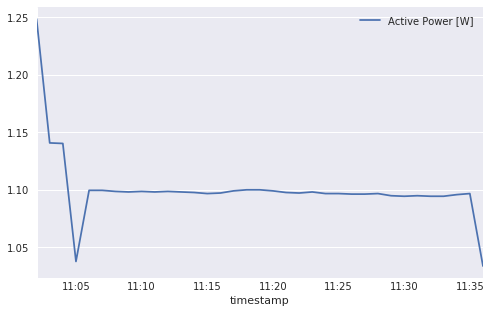

In [37]:
energieloggertest.plot(x='timestamp',y='Active Power [W]')

<div class="alert alert-block alert-info"><b>Zur Genauigkeit der Energielogger-Messungen: </b>

Wir haben untersucht, wie genau die Messwerte des Energieloggers auf seinem Display sind. \cite{kastenbutt_accuracy_2020}
</div>

## Praktikum Versuch 2: Professionelle Energiemessgeräte einsetzen

<div class="alert alert-block alert-warning"><b>Wichtig: Anleitung vor dem Praktikum durcharbeiten und Versuchsplan im Projektteam abstimmen! </b>Das Praktikum findet im Corona-Semester remote statt. Das bedeutet, dass die Messgeräte und Prüflinge bei mir zuhause stehen und Sie mir sagen, was ich wo einstecken soll, während Sie die Messgeräte von der Ferne über den Remote-Zugriff steuern. Da mehrere Projektteams an einem Versuchstermin teilnehmen, müssen wir die Zeit effizient nutzen. Im Folgenden finden Sie Felder, in denen Sie Ihre Vorbereitung eintragen können. Wenn die Versuchszeit endet und sie noch nicht alles gemessen haben, was Sie messen wollten, dann kann ich keine Verlängerung anbieten. D.h. wer unvorbereitet ist, und dann nicht alles schafft, hat Pech gehabt.</div>
<div class="alert alert-block alert-warning"><b>Wichtig: Anleitung vor dem Praktikum durcharbeiten und Versuchsplan im Projektteam abstimmen! </b>Auch für ein Präsenzpraktikum gilt: Da mehrere Projektteams an einem Versuchstermin teilnehmen, müssen wir die Zeit effizient nutzen. Im Folgenden finden Sie Felder, in denen Sie Ihre Vorbereitung eintragen können. Wenn die Versuchszeit endet und sie noch nicht alles gemessen haben, was Sie messen wollten, dann kann ich keine Verlängerung anbieten. D.h. wer unvorbereitet ist, und dann nicht alles schafft, hat Pech gehabt.</div>
<div class="alert alert-block alert-warning"><b>Notwendige Software bzw. Hardware: </b>

- python und jupyter notebook für Notizen mit Auswertung
- Tabellenkalkulationssoftware (MS Excel oder LibreOffice Calc oder ähnliche)
- USB-Stick, um Messdaten zu sichern - <b>sichern Sie vorher Ihre wichtigen Daten an anderer Stelle, denn es kann nicht garantiert werden, dass Daten auf dem USB-Stick beim Speichern in den Messgeräten verloren gehen </b>
- Rohde und Schwarz Software für Leistungsanalysator und Multimeter (s.u.)
</div>

### Sicherheitshinweise

<div class="alert alert-block alert-warning"><b>Remote-Versuch: </b>Auch, wenn Sie remote nicht in Gefahr sind, gehören Sicherheitshinweise auch zum Inhalt der Laborausbildung. Sie werden ja sicher als Ingenieur später auch selbst in Präsenz in Labors arbeiten. Daher werde ich auch remote eine Unterweisung durchführen.</div>
<div class="alert alert-block alert-warning"><b>Präsenz-Versuch: </b>Beachten Sie die folgenden Hinweise. Sie haben am Ende der Unterweisung Gelegenheit, Fragen zu stellen und dokumentieren mit Ihrer Unterschrift die Teilnahme an der Unterweisung. Ohne Unterweisung mit Unterschrift dürfen Sie nicht am Praktikum teilnehmen!</div>

#### Pünktlich mit Unterschrift

- das Praktikum beginnt **pünktlich** mit der Sicherheitsunterweisung im Praktikumsraum (siehe Stundenplan des aktuellen Semesters)
- Sie bestätigen mit Ihrer Unterschrift, dass Sie unterwiesen wurden und die Sicherheitshinweise verstanden haben.

#### Bei Krankheit

- Bei plötzlicher Krankheit, wenn möglich, abmelden (z. B. Info an Mitstudierende, Mail an Dozentin)
- Nachholtermin: Priorität auf dijenigen, die einen Termin aufgrund nachgewiesener Krankheit (Attest) nicht wahrnehmen konnten

#### Verhalten im Labor

- Rauchen, essen und trinken sind nicht erlaubt. Bitte gehen Sie dafür in einer Pause nach draußen.
- Notausgang: Labortür, diese freihalten (auch von Jacken und Taschen)
- Alarm: Verlassen Sie bei **anhaltendem Klingelzeichen** sofort das Gebäude und begeben Sie sich zum Sammelpunkt auf dem Parkplatz vor dem Hochschulgebäude.
- Abstellfläche für Jacken und Taschen: Nutzen Sie die Stuhllehnen (Jacken) und stellen Sie Ihre Taschen unter die Labortische, damit niemand darüber stolpert.
- Benutzen Sie **nicht** den im Labor HW2-42 vorhandenen Wasserhahn (Defekt im Abfluss)
- Achten Sie auf eng anliegende Kleidung und Schmuck, die sich nicht an Versuchseinrichtungen verfangen können.
- Verändern Sie auf keinen Fall die Sicherheitseinrichtungen. 
- Halten Sie sich an die Laborordnung, die Regelungen in der Sicherheitseinweisung und an die Bedienungsanleitungen für die Messgeräte und Prüflinge
- Beachten Sie vorhandene Warn- und Hinweisschilder
- Rechner, Geräte und Werkzeuge sind sorgfältig zu behandeln und deren Kenndaten zu beachten, um eine Zerstörung zu vermeiden. Für grob fahrlässige und vorsätzlich verursachte Schäden ist der Benutzer voll ersatzpflichtig.
- Nur an unterwiesenen Geräten arbeiten.
- Meiden Sie defekte oder auffällige Geräte umgehend, verwenden Sie diese nicht und entziehen Sie sie der Benutzung durch andere Personen. Reparaturen sind nicht Aufgabe der Praktikumsteilnehmer.

#### Not-Aus

- Not-Aus: **Im Notfall** an den Versuchstischen betätigen.
- Not-Aus: **Nicht ohne Grund** testen.

#### Bei Unfällen oder Brand

- **Elektrounfall**: immer dem Durchgangsarzt vorstellen (siehe [Rubrik Notfallorganisation, Abschnitt Wichtige Telefon- und Notrufnummern](http://fh-koeln.agu-hochschulen.de)
- **leichte Unfälle**: mit leichten Verletzungen, Unwohlsein oder Hautreaktionen Arzt aufsuchen
- **schwerwiegende und nicht einschätzbare Verletzungen durch Unfälle**: Notarzt alarmieren und Ersthelfer (z. B. Prof. May) rufen. Ortskundige Personen am Eingang des Gebäudes postieren, die den Notarzt auf direktem Weg zum Verletzten führen.
- Verbandkästen befinden sich in den angrenzenden Laboren. Defibrillatoren befinden sich in Halle West Ebene 1 gegenüber HW01-53 und im Zentralbereich des Hochhauses in Ebene 1 und Ebene 5. 
- Brand: Der nächstgelegene Feuerlöscher befindet sich im Gang. Informieren Sie die Feuerwehr (Tel 112) und die Leitwarte (0221 8275 2000) unter Nennung der Raumnummer. Wenn möglich, informieren Sie Anwesende und verlassen Sie das Gebäude auf den gekennzeichneten Fluchtwegen. Leisten Sie den Anweisungen der Feuerwehr Folge.

#### Versuchsdurchführung

- **Vor jedem Versuch und vor dem Einschalten:** Machen Sie sich mit der elektrischen Anordnung, deren Aufbau und Arbeitsweise sowie mit der Bedienung der verwendeten Geräte vertraut. 
- **Vor jedem Versuch:** Prüfen Sie, ob **augenscheinlich** der Versuchsaufbau einwandfrei ist. Insbesondere dürfen keine nassen elektrischen Geräte benutzt und keine nassen elektrischen Anlagen bedient werden.
- **Während den Versuchen:** Bei Störungen von Geräten ist deren Spannungsversorgung sofort abzuschalten, notfalls mit Not-Aus.
- Installieren oder Deinstallieren von Software auf den Rechnern ist untersagt, sofern dies nicht mit dem Laboringenieur oder Dozenten abgesprochen worden ist.
- Die Internetnutzung unterliegt den Bestimmungen des Wissenschaftsnetzes (WIN). Das Aufrufen oder Herunterladen von Netzinhalten, die gesetzeswidrig oder unsittlich sind, ist verboten.
- Werden extern erstellte Dateien in der Hochschule weiterbearbeitet, so sind sie unbedingt vorher mit einem aktuellen Viren-Scanner zu überprüfen.
- **Versuch 2**: Umstecken von Verbrauchern am Leistungsmessgerät nur durch Dozenten, solange Steckdosenadapter nicht mechanisch am Versuchstisch befestigt!
- **Versuch 2 und Versuch 3**: Wechsel der Leuchtmittel nur bei ausgesteckter Lampe!
- **Versuch 3**: Warmhalteplatte maximal auf 55°C erhitzen (mit Kontaktthermometer messen)!
- **Versuch 2 und Versuch 3**: Zum Anfassen heißer Leuchtmittel stehen Hitzeschutzhandschuhe zur Verfügung.
- **Versuch 1**: Beachten Sie die Bedienhinweise in der Bedienungsanleitung. Insbesondere dürfen Sie die Energielogger nicht bei extremer Hitze, Kälte, chemischen Einflüssen oder auch in feuer- bzw. explosionsgefährdeten Bereichen einsetzen.
- **Versuch 3**: Verwenden Sie den Temperatur-Tastfühler nicht an spannungsführenden Teilen!
- Räumen Sie nach den Versuchen auf: Schalten Sie Prüflinge und Messgeräte ab. Legen Sie einzelne Teile in ordentlicher Anordnung wieder zurück an ihre Plätze. Schließen Sie die Fenster und löschen Sie das Licht.

### Vorbereitung

- Diese Anleitung durcharbeiten
- Auftauchende Fragen recherchieren und notieren
- Ideen für projektrelevante Messungen im Projektteam überlegen und im Versuchsplan dokumentieren
- Leeren USB-Stick (es kann nicht garantiert werden, dass Daten darauf nicht verloren gehen!) und Schreibzeug sowie Taschenrechner mitbringen, möglichst auch eigenen Laptop
- vorzubereitende Software (s.o.) auf Ihrem Gerät installieren
- Vorgesehene Reihenfolge der Versuchsdurchführung einhalten, um Fehlmessungen und Fehlinterpretationen zu vermeiden

### Dokumentation

Die zugehörige Theorie kann in der mündlichen Prüfung abgefragt werden. Daher ist es sinnvoll, dass Sie das zum Versuch gehörige Jupyter Notebook mit Notizen und Messergebnissen aufbewahren bis zur mündlichen Prüfung. Bitte dokumentieren Sie so nachvollziehbar, dass die gesamte Projektgruppe bis zur Prüfung die Dokumentation nutzen kann. 

**Dateinamenskonvention**: `JJJJ-MM-TT_TeamX_SYE.ipynb` oder `JJJJ-MM-TT_TeamX_SYE_Messung_Leistung_Geraet_Hersteller_Modell.csv`, also z. B. `2005-05-08_TeamB_SYE_Kuehlschrank_Liebherr_Modellx3.csv`

Diese Dateinamenskonvention ist angelehnt an die ISO-Norm. Dadurch werden bei alphabetischer Sortierung alle Dateien in der Reihenfolge ihres Datums angezeigt, was ziemlich praktisch ist, wenn man noch erinnert, dass das eine Messung war, die man am Tag x im Monat y gemacht hatte. Außerdem kann man so mit dem Datum für das Jupyter Notebook eine Art Versionierung festlegen.

Im Jupyter Notebook verlinken Sie beim Einlesen und Auswerten alle Messdateien, die Sie im gleichen Verzeichnis wie das Notebook im Ordner `data` abgespeichert haben. Außerdem notieren Sie sich dort alle Metadaten, die das Messgerät nicht wissen kann. Z. B. notieren Sie sich, dass Sie einen Kühlschrank der Marke x und der Modellnummer xy gemessen haben, als er mit einem (Bild vom Innenleben hilft) bestimmten Inhalt gefüllt war. Zudem schreiben Sie alles weitere auf, was da noch relevant sein könnte (z. B. ob das Bier, das da im Kühlschrank zu sehen ist, gerade erst eingeräumt wurde, d.h. direkt vor der Messung oder schon eine Woche vorher). Diese Informationen nennen sich Metadaten. Im Jupyter Notebook lassen sie sich in komfortabel lesbarer Form in markdown-Zellen ergänzen. Diese Informationen müssen nicht unbedingt in Fließtext notiert werden. Manchmal eignen sich auch Tabellen-Ansichten oder Stichpunkte-Listen besser, weil sie übersichtlicher sein können.

Nach den Messdaten-Infos kommen die Code-Blöcke mit der Auswertung und die zugehörigen Diagramme. Im Markdown-Feld darunter beschreiben Sie dann, was man sehen kann und was überraschend ist, was ggf. unplausibel erscheint und welche Erkenntnisse Sie aus der Messung und Auswertung ziehen.

### Versuchsplan

Dokumentieren Sie hier, welche Messungen Sie im Projektteam planen. Bitte lesen Sie dafür in der Versuchsanleitung nach, welche Messgeräte zur Verfügung stehen und welche Prüflinge da sind. Wenn das Projektteam nicht geschlossen an einem Praktikumstermin teilnimmt, können Sie dieses Dokument natürlich sukzessive erweitern. **Wichtig ist, dass Sie VOR dem Praktikumstermin einen Plan haben.** Der Versuchsplan hier ist mit einem Beispiel befüllt. Sinnvoll ist es, wenn Sie hier alle für Ihr Projekt interessanten Messungen eintragen und zwar in der Reihenfolge ihrer Priorität, d.h. ganz oben die wichtigsten Messungen.

| **Ziel der Messung** | **Messgerät(e)** | **Prüfling** | **Nutzungsart** | **Messparameter** | **Kommentar** |
|-|-|-|-|-|-|
| Lastprofil Wasserkochen von vorher erwärmtem Wasser | Leistungsanalysator HMC8015, Pt100-Temperatursensor, Energielogger | Wasserkocher Huawei xyz | 800 ml Wasser ($T_{vorher} = 53°C$) zum Kochen bringen | alle 2 ms eine Messung von Spannung und Strom |2017-04-01_TeamX_SYE_Wasserkocher800mlvorher53C.csv |
|*Ihr Ziel* | *nötige Messgeräte* | *nötige Geräte* | *Art der Nutzung und Randbedingungen, die für Energieverbrauch wichtig sind* | *Einstellungen Messgerät(e)* | *Dateiname*, *Kommentare*|

### Professionelles Leistungsmessgerät für elektrische Verbraucher

<div class="alert alert-block alert-info"><b>Weiterführende Literatur: </b>

- [R&S®HMC8015 Power Analyzer Benutzerhandbuch, Ausgabe 2020](https://www.rohde-schwarz.com/de/handbuch/r-s-hmc8015-power-analyzer-benutzerhandbuch-handbuecher-gb1_78701-157004.html) \cite{rohde__schwarz_gmbh__co_kg_rs_2015}
- [HMExplorer Software Bedienhandbuch](https://www.rohde-schwarz.com/de/handbuch/hmexplorer-software-bedienhandbuch-handbuecher-gb1_78701-188611.html) \cite{rohde__schwarz_gmbh__co_kg_hmexplorer_2020}
</div>

Im Versuch arbeiten wir mit einem Messgerät für einphasige elektrische Verbraucher. Es verfügt über eine Messsteckdose, die (bei Präsenz-Labors) auch von Nicht-Elektroingenieuren verwendet werden kann. In Industrieanwendungen ist es häufig auch so, dass man in den Unterverteilungen Messtechnik anbringt und alle drei Phasen misst. Dafür ist jedoch eine Ausbildung zur elektrotechnischen Fachkraft sowie eine zugehörige Beauftragung nötig. Dies ist im Praktikum nicht durchführbar. Jedoch lassen sich die gelernten Methoden auch übertragen.

![Leistungsmessgerät HMC8015](https://cdn.rohde-schwarz.com/pws/product/h_1/hmc8015/HMC8015-Power-Analyzer_49537_11_w1300_hX.jpg)

Das Leistungsmessgerät HMC8015 mit den Optionen HOC151, HOC152, HOC153 von Rohde und Schwarz steht im Versuch zur Verfügung. Es ist mit einer Messsteckdose verbunden (Adapter HZC815-DE). Einen Auszug aus den technischen Daten finden Sie in der folgenden Tabelle. Die Messgenauigkeiten aller Messbereiche und Messarten enthält das Handbuch (Link s.o.).

| **Parameter** | **Wert** |
|-|-|
| Messmethode | gleichzeitiges Erfassen von Spannung und Strom |
| Analoge Bandbreite | DC bis 100 kHz |
| Frequenzgenauigkeit | 0,1% der Anzeige |
| AD-Konverterauflösung | 16 bit (Spannung), 16 bit (Strom) |
| Grundgenauigkeit | 0,05% der Anzeige |
| Anzeigeauflösung | 5 Stellen |
| Abtastfrequenz | 500 kHz |
| Leistungsaufnahme | 35 W max. 15 W typ. |
| Arbeitstemperatur | 5°C bis 40°C |
| Aufwärmzeit | 60 Minuten |

<div class="alert alert-block alert-warning"><b>Sicherheitshinweis! </b>Wenn Sie einen anderen Verbraucher als den am Steckdosenadapter angeschlossenen vermessen wollen, geben Sie bitte Bescheid. Das Umstecken erfolgt durch die Dozenten, denn aus versicherungstechnischen Gründen ist das Umstecken von Spannungen oberhalb der Schutzkleinspannungen eingewiesenen Fachkräften vorbehalten.</div>

**Sehr kurze Kurzfassung der Bedienungsanleitung für das HMC8015**:
- Bedienungsanleitung beachten!
- Sichtprüfung der Kabel: wenn defekte Isolierung auffällt, kein Betrieb erlaubt!
- Anschlussprüfung: sind die richtigen Kabel an den richtigen Stellen angeschlossen?
- Netzschalter an der Geräterückseite auf 1
- Spannungswählschalter an der Geräterückseite auf 230 V
- Power Schalter an der Vorderseite einschalten
- USB-Stick einstecken zur Datenspeicherung
- Tasten `U`, `I` mit Pfeil nach oben und unten: Einstellung Strom-/Spannungsmessbereich
- Taste `ACQ`: automatische Messbereichseinstellung, Einstellung Scheitelfaktor (Crest Factor) - wählen Sie beim Strom den Crest Factor 6, Einstellung Stromfehlermessung, Spannungsfehlermessung
- Taste `VIEW`: Auswahl von numerischen Werten, Waveform (Oszilloskop-Ansicht), Frequenzanalyse oder Inrush
- Taste `MEAS`: Loggen von Lastprofilen, Messung des Standby-Verbrauchs nach Normen, hier auch Auswahl des USB-Messverzeichnisses
- Drehschalter mit Pfeiltasten: Auswahl von Messwerten (durch drehen und drücken)

**Wichtig für den Remote-Versuch: HMExplorer-Bedienungsanleitung**:
- Besonders relevant: das Kapitel 2 "Erste Schritte"
- falls nicht automatisch gefunden: mit `Suche nach Geräten` HMC8015 suchen
- per Rechtsklick auf das Gerät Eigenschaften anzeigen
- per Doppelklick Auswahlfenster:
 - Screenshot: siehe Kapitel 7 im Handbuch: sinnvoller Weise vor der Übertragung Dateiname vorgeben! mit F5 Screenshot auf Computer übertragen - um zu sehen, was das Display anzeigt bei Remote-Versuch ganz praktisch
 - Power-Software-Modul, siehe Kapitel 11: hier ist alles möglich, was auch im Folgenden möglich ist in der Hardware!
 - SCPI Terminal: zum Erstellen von automatisierten Messroutinen (im Praktikum nicht relevant)

## Verfügbare elektrische Verbraucher

### Leuchtmittel

Zum Anschluss steht eine MAULstudy Tischleuchte mit E27 Fassung zur Verfügung. Drei verschiedene Leuchtmittel können eingesetzt werden, im Folgenden die Datenblattangaben aus den Verpackungen:

|**Typ** | **Glühlampe** | **Halogen** | **Leuchtstoff** | **LED-Lampe** |
|-|-|-|-|-|
| **$P_N$** | 60 W | 57 W | - | 7 W |
| **$U_N$** | 235 V | 230 V | - | - |
| **$I_N$** | - | - | - | 55 mA |
| **$P_{\text{äquivalent,Glühlampe}}$** | - | 70 W | - | 60 W |
| **Lichtstrom** | 806 lm | 915 lm | - | - |
| **Farbtemperatur** | - | 2800 K | - | 2700 K |
| **Verbrauchsangabe** | 60 kWh/1000 h |  - | - | 7,0 kWh/1000 h|
| **Lebensdauerangabe** | 5000 h | - | - | 2000 h, 2 Jahre, 50000 Schaltzyklen|
| **Marke /Hersteller** | Barthelme | Osram | IKEA | SEGULA |
| **Energieeffizienzklasse** | E | D | - | A++|
| **Sonstiges** | klar | ohne Quecksilber |  - | matt |

Beginnen Sie im Praktikum damit, die energieeffizienteste Lampe zu vermessen, da diese sich am wenigsten erhitzt und sich somit leichter tauschen lässt.

*Remote-Versuch*: Als Tischleuchte mit E27-Fassung steht eine [Artemide Tolomeo-Leuchte](https://www.artemide.de/tolomeo/tolomeo#group-1) zur Verfügung. Die oben genannten Leuchtmittel können ebenfalls eingesetzt werden. Zudem steht eine Osram-LED-Glühlampe zur Verfügung, deren Daten sich auf der Glühlampe ablesen lassen.

### Bildschirm (Monitor)

Im Labor handelt es sich um einen Fujitsu B24-8TS-PRO. Der Verbrauch laut dem beiligenden australischen Energielabel energyrating.gov.au beträgt 85 kWh/Jahr. Auf der [Herstellerseite](https://www.fujitsu.com/de/products/computing/peripheral/displays/b24-8-ts-pro/) finden Sie weitere Label-Ratings.
<br><br>
Im *Remote-Labor* handelt es sich um einen LG FLATRON IPS231 mit energy star Label oder evtl. um ein anderes Gerät.

### Computer

Der Computer im Labor hat die folgenden Rahmendaten und den TH Köln Desktop mitsamt zugehöriger Software installiert.

| **Parameter** | **Wert** |
|-|-|
| Hersteller | Dell |
| Bezeichnung  | OptiPlex 3050 Minitower XCTO |
| Prozessor | Intel Core i7-6700 (QC8 MB8, T3,4 GHz 65 W) der 6. Generation, unterstützt Windows und Linux |
| Arbeitsspeicher | 4 GB DDR4-Speicher (1 x 4 GB, 2.400 MHz, kein ECC) |
| Festplatte | SATA-SSD-Festplatte (Klasse 20), 2,5 Zoll, 256 GB |
| Grafikkarte | integrierte Intel-Grafiklösung |
| Gehäuse-Alarmschalter | ohne |
| Festplattenkonfiguration | kein RAID |
| Optische Laufwerke | optisches DVD-ROM-Laufwerk, 8x (9,5 mm) |
| Wireless-Netzwerke | keine Wireless-Funktion | 
| Kabel | Netzkabel-EU |
| Tastatur | Dell KB216 Multimedia-Tastatur, schwarz - Deutsch (QWERTZ) |
| Maus | Dell MS116 Maus, kabelgebunden, schwarz |
| Gehäuseoptionen | Netzteil für OptiPlex 3050 MT (Bronze) |
| Energy Star | ESTAR 6.1 und TCO 5.0-konformer Treiber, Serviceinstallationsmodul |
| Weiteres Zubehör | erstes 8 GB RAM (Umbau von 1x 4 GB auf 1x 8 GB) - 1RX8-UDIMM mit 2.400 MHz |
| Festplatte Software | ohne Intel Smart-Response-Technik |

Der Computer *Remote* ist ein Lenovo ThinkCentre (ThinClient) MT-M 3237 -FF5 S/N PBE445N. 
Zudem kann auch das Ladeverhalten eines Thinkpad und eines Lenovo X1 Yoga vermessen werden (letzterer mit Docking-Station, an der zudem wahlweise eine Headset-Ladestation, ein Konferenzmikrofon, eine SSD-Festplatte, eine Dokumentenkamera sowie ein Logitech-Funk-Adapter) hängen.

### Weitere verfügbare Geräte

Im Labor können Sie Ihre eigenen Geräte vermessen, falls diese elektrisch in Ordnung sind. *Remote* stehen weitere Geräte zur Verfügung. Bitte melden Sie sich **zu Beginn** des Versuchstermins, um zu klären, ob das gewünschte Gerät vermessen werden kann.

### Messgerät kennenlernen mit Beispielmessungen

<div class="alert alert-block alert-info"><b>Aufgabe: </b>
Zur Einführung führen Sie gemeinsam einige Messungen durch. Wechseln Sie sich dabei ab bei der Bedienung des HMExplorers. Sie können ein Gerät auswählen, mit dem Sie alle Messungen ausprobieren.</div>

*Antwort: Wir haben uns auf das Gerät ... geeinigt. Die ersten ... Minuten wird ... das Messgerät steuern. Danach wird ... das Messgerät steuern für weitere ... Minuten. Danach ... Danach ...*

Notieren Sie sich während der Versuchsdurchführung Stichpunkte zu Ihren Messungen (was wurde gemessen, was ist aufgefallen, welche Parameter wurden beobachtet oder eingestellt). Notieren Sie sich ebenfalls die Namen der Messdateien sowie die Metadaten zur Messung (z. B. welche Einstellung das Gerät bei der Messung hatte). 

<div class="alert alert-block alert-info"><b>Messbereich einstellen am Leistungsanalysator: </b>

- Falls Messwerte stark schwanken, können Sie die Anzeige des Leistungsanalysators einfrieren mit der Taste `HOLD`. Wenn Sie dann erneut `HOLD` drücken, zeigt die Anzeige wieder die aktuellen Messwerte an.
- Stellen Sie den Messbereich so klein wie möglich ein: `VIEW`, Auswahl `Numeric`: alle Balken sollten grün sein ohne rote Bereiche.
- Warum ist es besser den kleinstmöglichen Messbereich zu wählen? Was passiert, wenn der Bereich zu groß oder zu klein gewählt wird?
</div>
<div class="alert alert-block alert-info"><b>Messbereich Remote in der Software einstellen: </b>

- In der oberen Zeile im Programm (rechts neben dem `Logging` Knopf) mit den Pfeilen den Spannungsmessbereich (`Range` mit blauen Pfeilen) und den Strommessbereich (`Range` mit den roten Pfeilen) auswählen.
- Auf dem Display (Kamerabild zoomen) sieht man, ob der Balken rote Bereiche enthält in der Ansicht `VIEW`, Auswahl `Numeric`: alle Balken sollten grün sein ohne rote Bereiche.
- Warum ist es besser den kleinstmöglichen Messbereich zu wählen? Was passiert, wenn der Bereich zu groß oder zu klein gewählt wird?
</div>

*Antwort: Wenn man den richtigen Messbereich auswählt, dann ...*

<div class="alert alert-block alert-info"><b>Screenshots machen am Leistungsanalysator: </b>
Einige Anzeigen des HMC8015 lassen sich nur als Screenshots speichern:

1. USB-Stick einstecken
2. Taste `SAVE RECALL`
3. Screenshot `STORAGE Front USB`
4. `FILE NAME` hier max. 8 Zeichen eingeben, die Ihnen helfen, zu wissen, was Sie gemessen haben
5. `ACCEPT`
6. `COLOR & FORMAT BMP`
7. `SAVE RECALL` lang drücken um zu speichern
</div>
<div class="alert alert-block alert-info"><b>Screenshots machen in der Software: </b>
Einige Anzeigen lassen sich nur als Bild speichern, nicht als csv-Datei:
    
1. Rechtsklick auf die gewünschte Anzeige.
2. `Save as Picture`
3. Dateinamen wählen
4. am besten diese Dateien immer wieder in sciebo hochladen, so dass alle auf ihren Rechnern auch mit den Daten hantieren können, sie beispielsweise in ihrer Doku einfügen können
</div>
<div class="alert alert-block alert-info"><b>Signalform: </b>
Speichern Sie einen Screenshot der Signalform ab:

1. `VIEW`
2. `Waveform`
3. Messbereiche ggf. nachjustieren (so, dass Bildschirm genutzt wird, ohne dass Messbereiche zu klein werden)
4. Menü im Display mit `RETURN` wegklicken, so dass Menü nicht auf Screenshot
5. Screenshot siehe voriger Absatz
</div>
<div class="alert alert-block alert-info"><b>Oberwellen: </b>
Speichern Sie einen Screenshot der Frequenzanteile ab:

1. `VIEW`
2. `Harmonics`
3. `SOURCE I` (Strom)
4. `SCALING` Prozent
5. `SUBSET` `Even Odd` beide gelb = ausgewählt
6. `NUMBER` 50
</div>

*Die Screenshots zeigen Messungen von ... Verhalten des Verbrauchers. Sie sind gespeichert und können hier angezeigt werden mit `![was das zeigen soll](img/jjjj-mm-tt-dateiname-messung.bmp]`, wenn Sie im Ordner `img/` im Verzeichnis vom jupyter notebook liegen. Der Zusammenhang zwischen Oberwellenanteil und Signalform ist ... Der Parameter ... im Menü `VIEW` $\to$ `Numeric` in der Ansicht ... ist ein Maß für den Oberwellenanteil. Interessanter ist der Strom (?) oder die Spannung (?), weil ... Ergänzen Sie auch Ihre Kommentare, Erkenntnisse, etc. hier im Jupyter Notebook.*

<div class="alert alert-block alert-info"><b>Arbeitspunkte (Betriebszustände) unterscheiden: </b>
Messen Sie für Ihr Gerät unterschiedliche Arbeitspunkte:

- <b>Standby</b>: angesteckt und aus
- <b>Ruhemodus</b>: an, keine Aktivität
- <b>Aktivität</b>: an, notieren Sie die Aktivität (z. B. youtube Video xy)
- <b>hohe Auslastung</b>: z. B. Leistungstest PC
</div>
<div class="alert alert-block alert-info"><b>Arbeitspunkte (Betriebszustände) in einer Tabelle vergleichen: </b>
Erstellen Sie eine Tabelle und ergänzen Sie dort die gewonnenen Erkenntnisse:
</div>
<div class="alert alert-block alert-info"><b>Hinweis zu Arbeitspunkten Remote: </b>
Geben Sie mir Instruktionen, was ich machen soll, dann stecke ich Verbraucher um oder öffne ein Programm auf einem PC etc.
</div>

| **Messung** | **Gerät 1** | **Gerät 2** |
|-|-|-|
| **Signalform Standby** | ... | ... |
| **$P$ [W]** | ... |... |
| **$S$ [VA]** | ... | ... |
| **$I_{THD}$ [%]** | ... | ... |
| **$\lambda$** | ... | ... |
| **Signalform Ruhemodus** | ... | ... |
| **$P$ [W]** | ... |... |
| **$S$ [VA]** | ... | ... |
| **$I_{THD}$ [%]** | ... | ... |
| **$\lambda$** | ... | ... |

<div class="alert alert-block alert-info"><b>Frage: </b>
Welchen Zusammenhang können Sie zwischen dem Oberwellenanteil und der Signalform feststellen? Wie hängen die notierten Parameter zusammen?</div>

*Antwort:...*

<div class="alert alert-block alert-info"><b>Zahlenwerte mit hoher Auflösung erfassen mit dem Leistungsanalysator: </b>

Um die Signalformen nicht nur als Screenshot, sondern auch im Zahlenformat als csv-Datei speichern zu können, gehen Sie folgendermaßen vor: `VIEW`, `Inrush`, `SET Acquisition time`, `RETURN`, `ACT`, `SAVE`, `Namen der .csv-Datei notieren!`
</div>
<div class="alert alert-block alert-info"><b>Zahlenwerte mit hoher Auflösung als csv erfassen mit der Software: </b>

1. Klicken Sie auf das unterste grafische Symbol in der Software (`Inrush`). 
2. Wählen Sie dann das Untermenü `Inrush` aus. 
3. Entscheiden Sie sich für eine Aufnahmedauer und geben Sie diese in Sekunden ein. 
4. Klicken Sie auf `On`.
5. Klicken Sie auf `Activate`. 
6. Warten Sie auf die Messung. Klicken Sie dann auf `Off`. 
7. Mit Rechtsklick in der Darstellung dieser Messung wählen Sie `Save as csv` aus. 
8. Laden Sie die Daten in den sciebo-Ordner.
9. Werten Sie diese Daten wie oben gezeigt aus (im Theorieteil dieses Notebooks). 
</div>

*Stellen Sie hier Ihre Beispielmessung dar und notieren Sie Ihre Beobachtungen und Erkenntnisse.*

<div class="alert alert-block alert-info"><b>Aufnahme von kurzen Lastprofilen: </b>
Für längere Lastprofile im Bereich von mehreren Stunden reicht die Zeit im Praktikum nicht. Diese können Sie nur mit dem Energielogger aufnehmen. Jedoch kann im Praktikum durchaus ein kürzeres hochaufgelöstes Profil aufgenommen werden, das zeigt, wie unterschiedliche Betriebsmodi sich verhalten und wie der Übergang dazwischen wirkt. Um ein Lastprofil im HMC8015 aufzunehmen, gehen Sie wie folgt vor. Tragen Sie dann das Lastprofil in einem Diagramm auf und vergleichen Sie es mit einer Messung mit dem Energielogger. Notieren Sie danach auch im Jupyter Notebook, wie Abweichungen begründet werden könnten und wie gut die Profile übereinstimmen. Wie viel Energie benötigt der Energielogger in verschiedenen Lastpunkten zum Messen?
</div>
<div class="alert alert-block alert-info"><b>Am Leistungsanalysator: </b>
    
- USB-Stick eingesteckt
- Verbraucher an, auf höhere Leistung und Messbereiche Strom und Spannung einstellen (keine roten Balken)
- `MEAS`, `Integrator ACTIVATE On`, `Reset`, `RETURN`
- `Logging`, `Storage Front USB`, `FILE NAME` auswählen und eingeben, `Interval 0.1 s`, `MODE Unlimited`, `ACTIVATE Logging On`
- Logging jeweils beenden mit `MEAS`, `Logging`, `Activate OFF`, es wird automatisch die Datei gespeichert
</div>
<div class="alert alert-block alert-info"><b>Remote in der Software: </b>

- Klicken Sie auf das Werkzeugsymbol.
- Klicken Sie auf `Measurement`.
- Aktivieren Sie `Integrator`. 
- Klicken Sie auf `Reset`. 
- Klicken Sie auf `Start`. 
- Klicken Sie oben auf `Logging` (roter Kreis). 
- Wenn Sie erneut auf `Logging` klicken, wird Ihnen die aufgenommene Datei angezeigt. 
- Klicken Sie auf `Stop`. 
- Sichern Sie die Datei auf sciebo, um weitere Auswertungen auf Ihrem Rechner durchführen zu können.
</div>

In [38]:
# Hier muss Ihr eigener Dateiname stehen, damit Sie Ihre erste Messung einlesen können
testmessung = pd.read_csv('../data/2020_11_14_164426.csv',sep=';',decimal=',')
testmessung.head()

SystemTime  URAN  IRAN      URMS      UAVG       UPP       UMP  \
0  14.11.2020 16:44:26   300  0.05  237.1061 -0.027163  327.4886 -327.5449   
1  14.11.2020 16:44:26   300  0.05  237.1190 -0.044139  327.5168 -327.6012   
2  14.11.2020 16:44:26   300  0.05  237.0890 -0.013129  327.5168 -327.5731   
3  14.11.2020 16:44:26   300  0.05  237.0970 -0.034000  327.4041 -327.6012   
4  14.11.2020 16:44:26   300  0.05  237.0636 -0.021378  327.4604 -327.5731   

       IRMS      IAVG       IPP  ...    PHIIK42   PHIIK43   PHIIK44   PHIIK45  \
0  0.042568 -0.000034  0.150946  ...   70.07353  65.85122  177.2153  163.9607   
1  0.042623 -0.000081  0.150187  ...   43.90697  65.22590  159.0492  165.9208   
2  0.042574 -0.000052  0.150421  ... -170.66170  58.61349  -35.7922  160.8158   
3  0.042656 -0.000081  0.149859  ...  -16.90296  55.65462  102.6666  159.0915   
4  0.042609 -0.000053  0.149784  ...   15.02166  65.40586 -144.2838  164.1570   

     PHIIK46   PHIIK47     PHIIK48   PHIIK49    PHIIK50  Unnamed: 242  
0 -113.31010 -63.64154   18.089130  67.69239  114.22340           NaN  
1  -86.89516 -60.48615   26.961680  71.40198  150.10910           NaN  
2   89.50747 -65.82640 -169.228200  65.03225  -54.44187           NaN  
3 -123.55230 -67.70645    8.734419  62.08249  148.42380           NaN  
4  107.04550 -67.01524  -33.122580  63.77435  148.33880           NaN  

[5 rows x 243 columns]

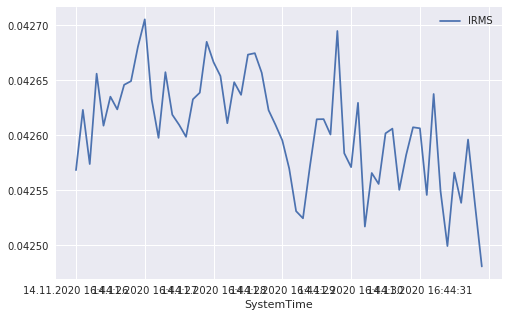

In [39]:
testmessung.plot(x='SystemTime', y='IRMS')

<div class="alert alert-block alert-info"><b>Aufgabe: </b>
Einigen Sie sich, wer in welcher Reihenfolge den HMExplorer per Fernzugriff bedienen darf und welche Geräte Sie in welcher Reihenfolge vermessen wollen und tragen Sie dies in einer Tabelle ein. Die letzten Messungen kommen ggf. nicht mehr dran, falls die Zeit nicht reicht.
</div>

| **Messung Nr.** | **Name** | **Gerät** | **Art der Messung** |
|-|-|-|-|
|1| Donald | Ladegerät Laptop | Laptop aus, nur Ladebetrieb, Lastprofil loggen für 10 Minuten |
|2| Melania | Bildschirm | Leistungsaufnahme hochaufgelöst |
| 3| ... | ... | ... |

# References

(<a id="cit-lerch_elektrische_2016" href="#call-lerch_elektrische_2016">Lerch, 2016</a>) Reinhard Lerch, ``_Elektrische Messtechnik_'',  2016.  [online](http://link.springer.com/10.1007/978-3-662-46941-5)

(<a id="cit-aschendorf_grundlagen_2014" href="#call-aschendorf_grundlagen_2014">Aschendorf, 2014</a>) Aschendorf, ``_Grundlagen zur elektromechanischen Messung_'', in Energiemanagement durch Gebäudeautomation, , Springer Fachmedien Wiesbaden, pp. 823--860,  2014.  [online](http://link.springer.com/10.1007/978-3-8348-2032-7_10)

(<a id="cit-hesselbach_energie-_2012" href="#call-hesselbach_energie-_2012">Hesselbach, 2012</a>) Jens Hesselbach, ``_Energie- und klimaeffiziente Produktion: Grundlagen, Leitlinien und Praxisbeispiele ; mit 34 Tabellen_'',  2012.

(<a id="cit-brownlee_moving_2016" href="#call-brownlee_moving_2016">Brownlee, 2016</a>) Jason Brownlee, ``_Moving Average Smoothing for Data Preparation and Time Series Forecasting in Python_'',  2016.  [online](https://machinelearningmastery.com/moving-average-smoothing-for-time-series-forecasting-python/)

(<a id="cit-muhl_elektrische_2017" href="#call-muhl_elektrische_2017">Mühl, 2017</a>) Thomas Mühl, ``_Elektrische Messtechnik: Grundlagen, Messverfahren, Anwendungen_'',  2017.

(<a id="cit-hoffmann_taschenbuch_2015" href="#call-hoffmann_taschenbuch_2015">Adunka, 2015</a>) Franz Adunka, ``_Taschenbuch der Messtechnik_'',  2015.

(<a id="cit-conrad_bedienungsanleitung_2020" href="#call-conrad_bedienungsanleitung_2020">Conrad, 2020</a>)  Conrad, ``_Bedienungsanleitung Energiekostenmessgerät Energy Logger 4000 Best.-Nr. 125444_'',  2020.  [online](https://asset.conrad.com/media10/add/160267/c1/-/gl/000125444ML02/bedienungsanleitung-125444-voltcraft-energy-logger-4000-energiekosten-messgeraet-stromtarif-einstellbar-kostenprognose.pdf)

(<a id="cit-conrad_voltcraft_2020" href="#call-conrad_voltcraft_2020">Conrad, 2020</a>)  Conrad, ``_VOLTCRAFT® Benutzerhandbuch Voltsoft_'',  2020.  [online](https://asset.conrad.com/media10/add/160267/c1/-/de/001435090ML01/bedienungsanleitung-1435090-temperatur-datenlogger-voltcraft-dl-200t-30-bis-60-c-pdf-funktion-kalibriert-nach-werksstandard-ohne-zertifi.pdf)

(<a id="cit-maximilian_augsdorfer_projektdokumentation_2019" href="#call-maximilian_augsdorfer_projektdokumentation_2019">Maximilian Augsdörfer} and {Maximilian von Hirschheydt} and {Lars Petersen} and {Benedikt Remmel, 2020</a>)  Maximilian Augsdörfer} and {Maximilian von Hirschheydt} and {Lars Petersen} and {Benedikt Remmel, ``_Projektdokumentation SYE Projektgruppe 3 Wintersemester 2019/2020_'',  2020.

(<a id="cit-kastenbutt_accuracy_2020" href="#call-kastenbutt_accuracy_2020">Kastenbutt, Waasem <em>et al.</em>, 2020</a>) Kastenbutt Florian, Waasem Lukas and May Johanna, ``_Accuracy of Household Size Low Cost Energy Loggers_'', , vol. , number , pp. 10,  2020.  [online](https://www.researchgate.net/publication/344438991_Accuracy_of_Household_Size_Low_Cost_Energy_Loggers)

(<a id="cit-rohde__schwarz_gmbh__co_kg_rs_2015" href="#call-rohde__schwarz_gmbh__co_kg_rs_2015">Rohde \& Schwarz GmbH \& Co. KG, 2015</a>)  Rohde \& Schwarz GmbH \& Co. KG, ``_R\&S HMC8015 Power Analyzer Benutzerhandbuch_'',  2015.  [online](https://scdn.rohde-schwarz.com/ur/pws/dl_downloads/dl_common_library/dl_manuals/gb_1/h/hmc80115/HMC8015_UserManual_de_05.pdf)

(<a id="cit-rohde__schwarz_gmbh__co_kg_hmexplorer_2020" href="#call-rohde__schwarz_gmbh__co_kg_hmexplorer_2020">Rohde \& Schwarz GmbH \& Co. KG, 2020</a>)  Rohde \& Schwarz GmbH \& Co. KG, ``_HMExplorer Software Benutzerhandbuch_'',  2020.  [online](https://scdn.rohde-schwarz.com/ur/pws/dl_downloads/dl_common_library/dl_manuals/gb_1/h/hmexplorer/1178.3305.03_HMExplorer_UserManual_de_03.pdf)

